In [192]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [193]:
df=pd.read_csv("Train data.csv")
print(df)
df.describe()



      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [194]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [195]:
for col in df.iloc[:,1:].columns:
  print(df[col].value_counts())


Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60

*after getting familiar to data, first step is to  deal with null vaalues, for categorical data we use mode, and mean for numerical data.

In [196]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = pd.to_numeric(df['Loan_Amount_Term'], errors='coerce')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())




In [197]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [198]:
labelencoder = LabelEncoder()
df['Gender']= labelencoder.fit_transform(df['Gender'])
df['Married']= labelencoder.fit_transform(df['Married'])
df['Dependents']= labelencoder.fit_transform(df['Dependents'])
df['Education']= labelencoder.fit_transform(df['Education'])
df['Self_Employed']= labelencoder.fit_transform(df['Self_Employed'])
df['Property_Area']= labelencoder.fit_transform(df['Property_Area'])
df['Loan_Status']= labelencoder.fit_transform(df['Loan_Status'])


In [199]:
df


Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001002       1        0           0          0              0   
1    LP001003       1        1           1          0              0   
2    LP001005       1        1           0          0              1   
3    LP001006       1        1           0          1              0   
4    LP001008       1        0           0          0              0   
..        ...     ...      ...         ...        ...            ...   
609  LP002978       0        0           0          0              0   
610  LP002979       1        1           3          0              0   
611  LP002983       1        1           1          0              0   
612  LP002984       1        1           2          0              0   
613  LP002990       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2            1  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[614 rows x 13 columns]

In [200]:
for col in df.iloc[:,1:].columns:
  print(df[col].value_counts())

Gender
1    502
0    112
Name: count, dtype: int64
Married
1    401
0    213
Name: count, dtype: int64
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64
Education
0    480
1    134
Name: count, dtype: int64
Self_Employed
0    532
1     82
Name: count, dtype: int64
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0

to note the differences among different values for each feature, it better to illustrate it visually using histograms

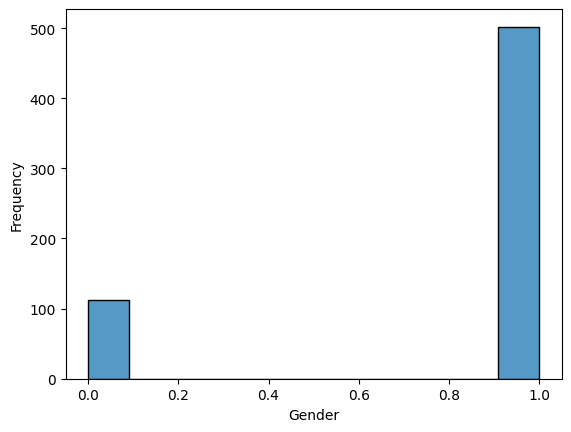

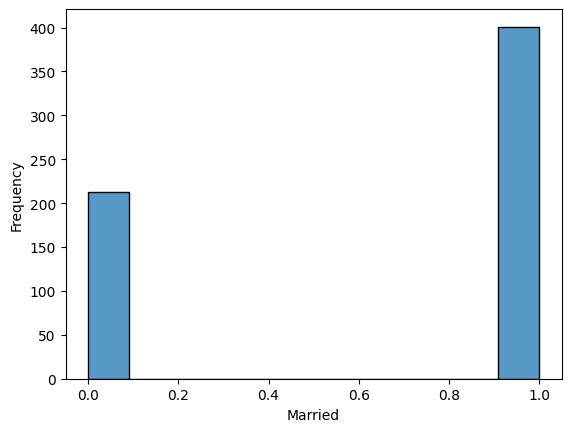

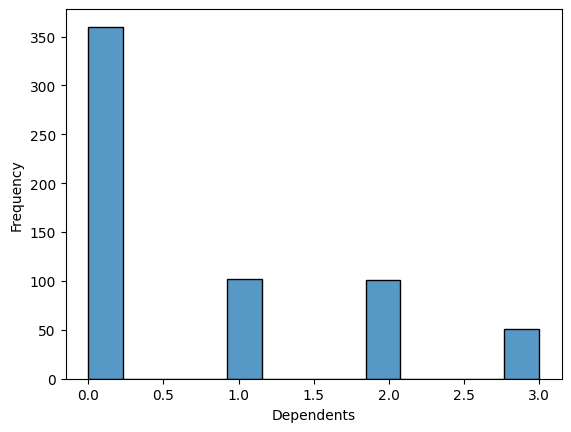

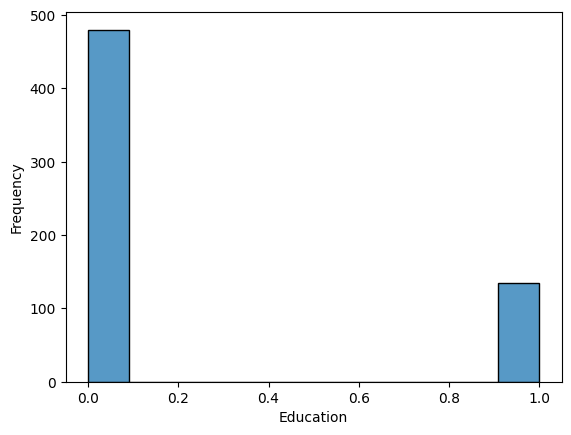

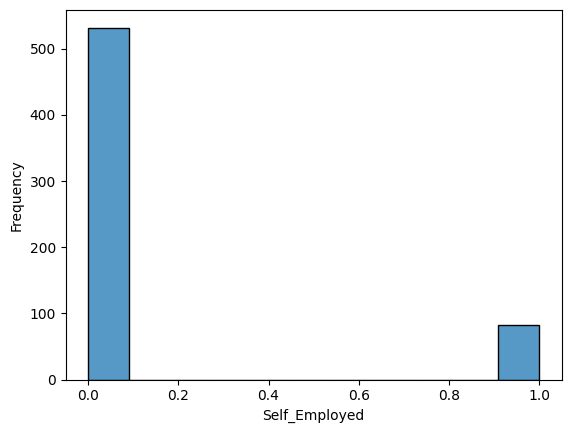

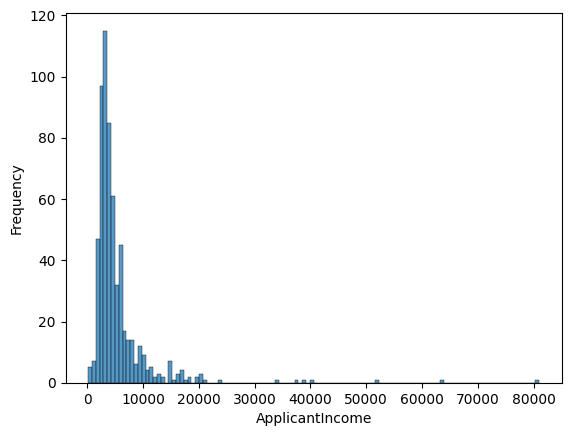

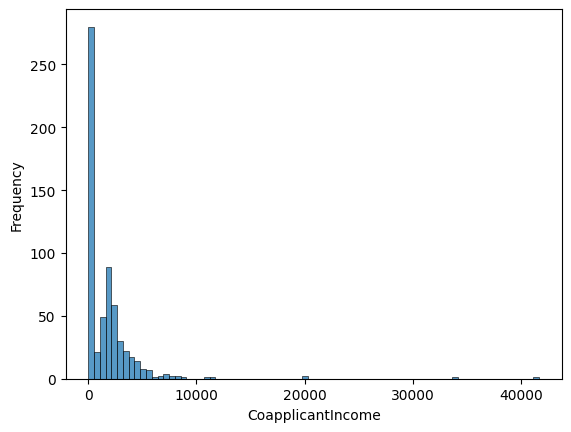

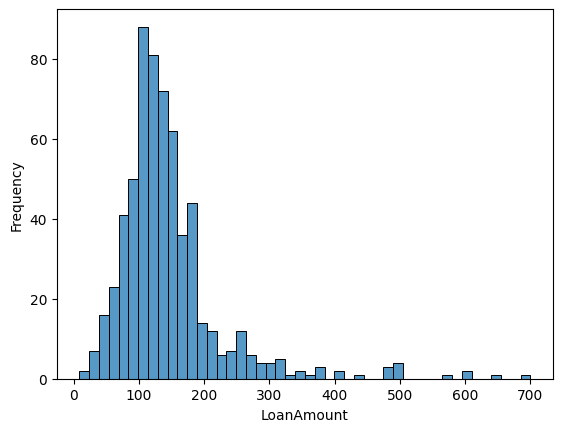

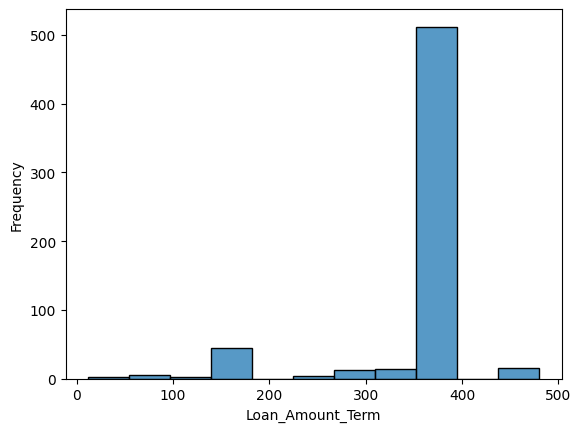

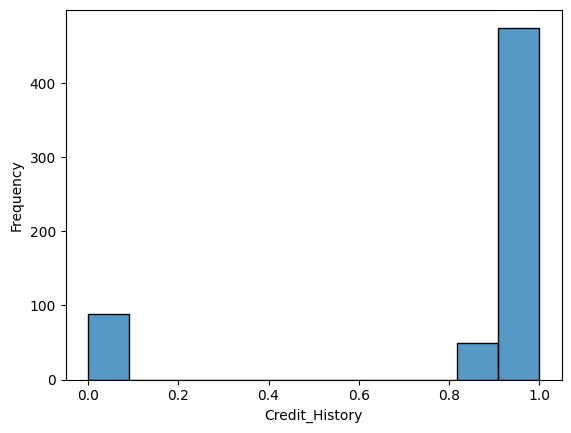

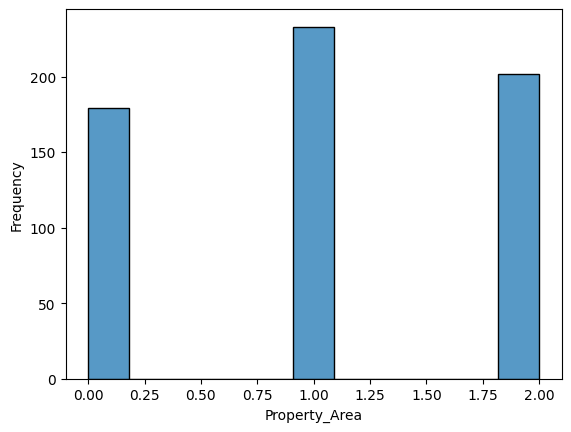

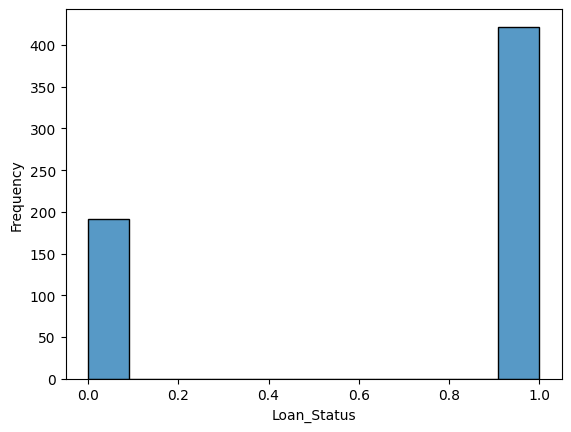

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.iloc[:,1:].columns:
  sns.histplot(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


because the ranges of the numerical data are differents, and it's almost normaly ditributid, so we will make standardization in case we used a models that consider the variety of scales and ranges among features.

take in consideration that little points on the right side of histogram, it are not frequent enough, so it is easy to say that it are outliers just by eye observation, we notice them in features: ApplicantIncome, coapplIcantIncom, LoanAmount

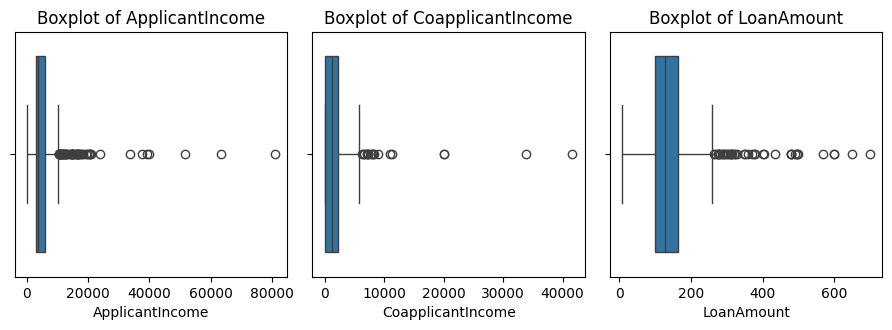

In [202]:
original_numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',]
plt.figure(figsize=(12, 6))
for i, col in enumerate(original_numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

do not get tricked by features Loan_Amount_Term and Credit_history this feature is just a time and indication number repectivey, so we do not need to dp any outliers preprocssing for them.

study the correlation before standardization, and outlier removing, then look for change after them. the purpose is to find the effectiveness of the method we used in removing outliers, also to find out its effect on correlation between some infeluencing features specially which represent amount of money, or time


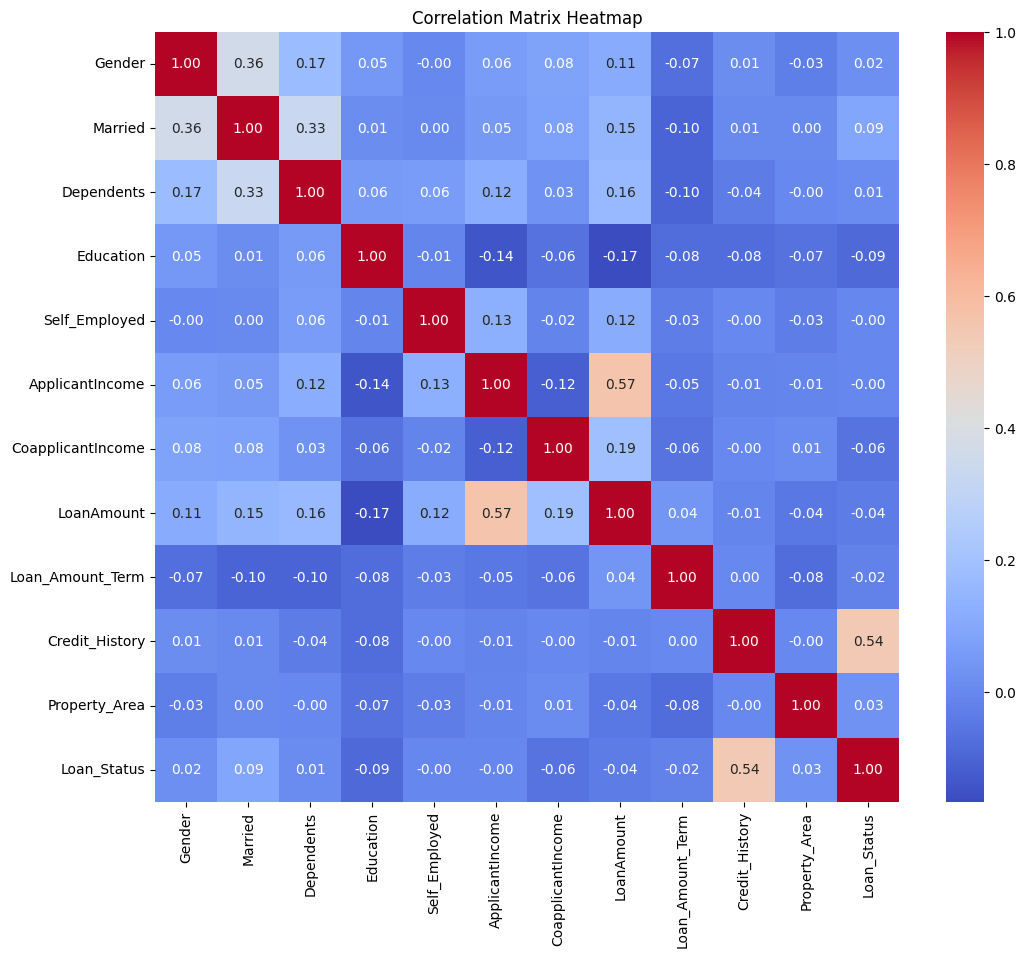

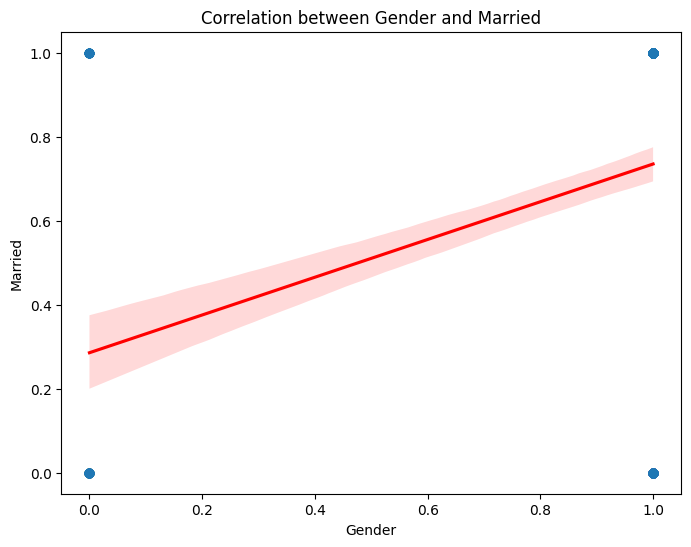

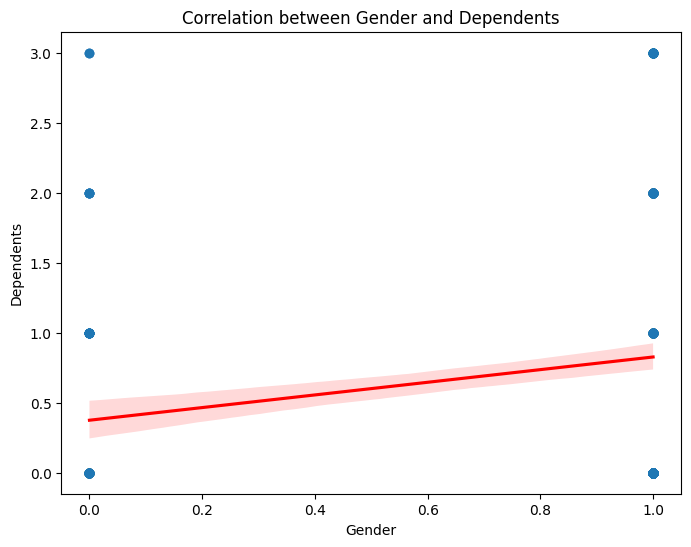

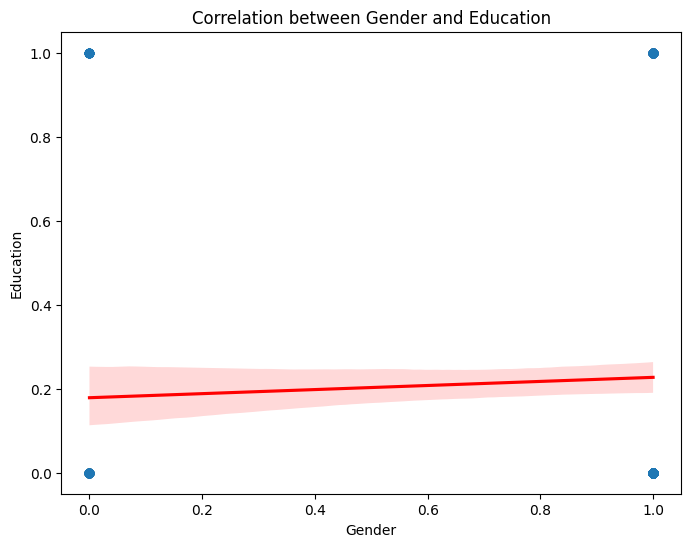

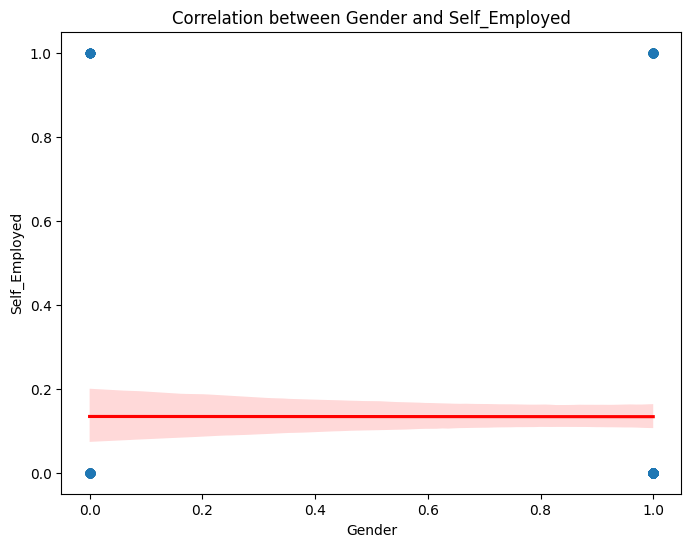

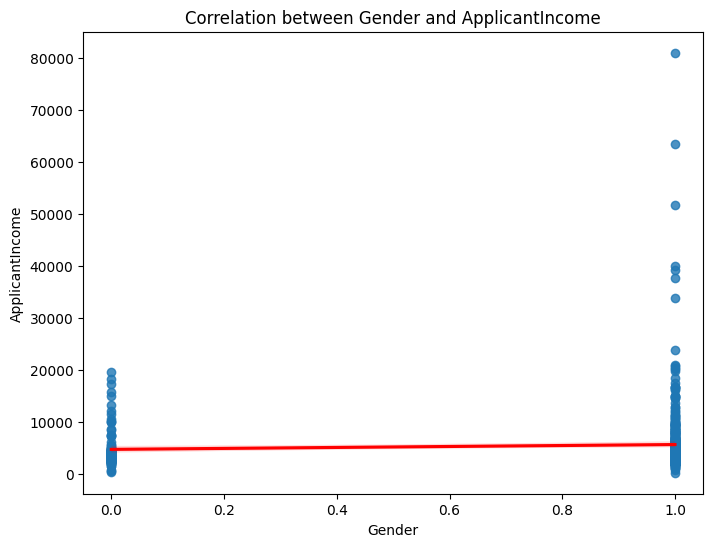

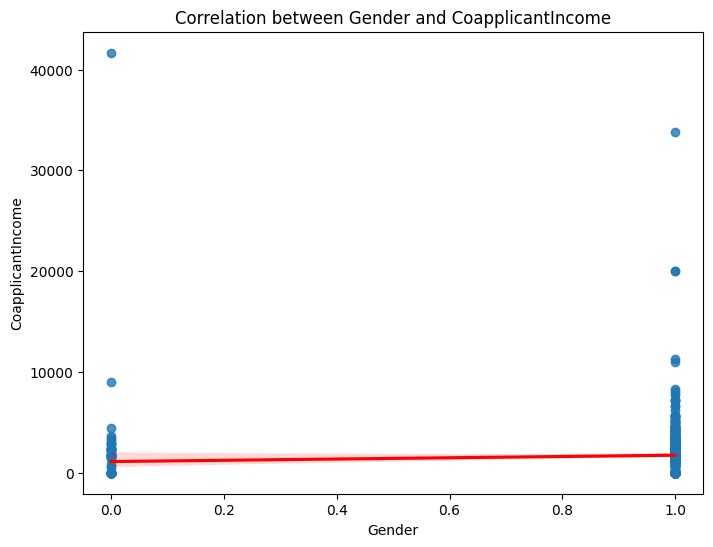

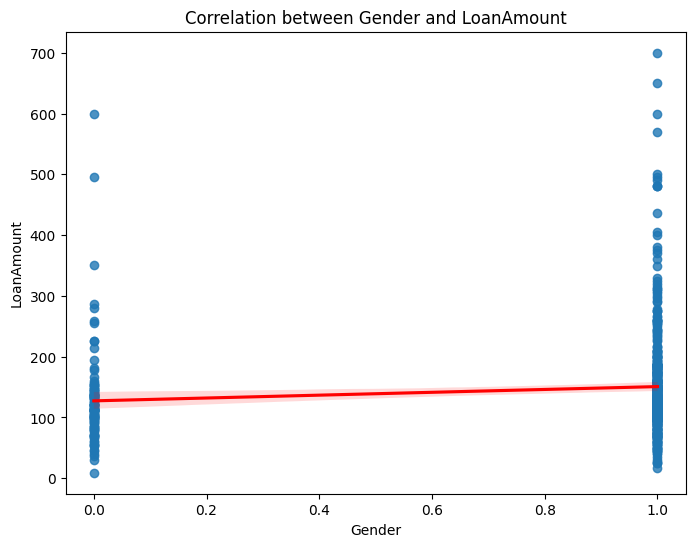

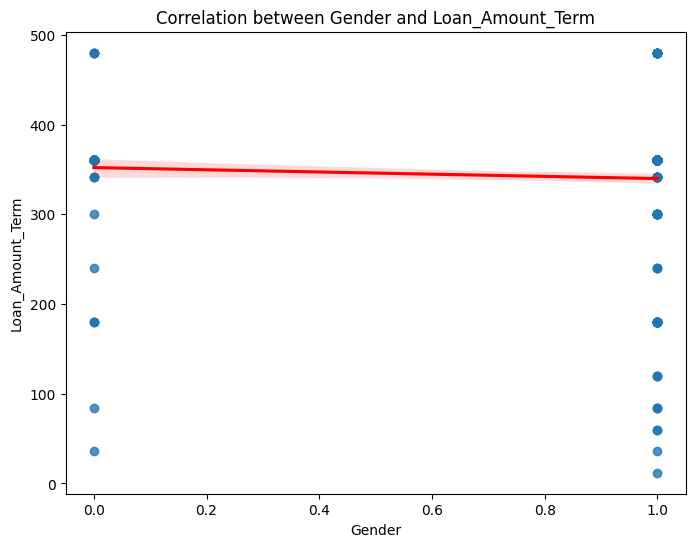

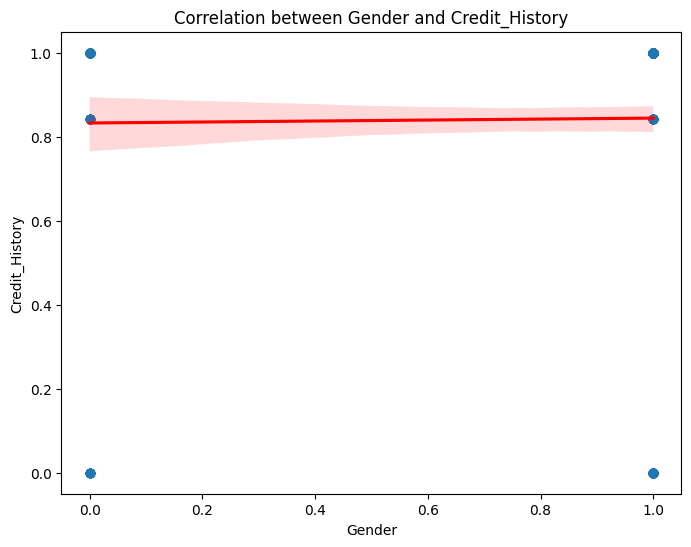

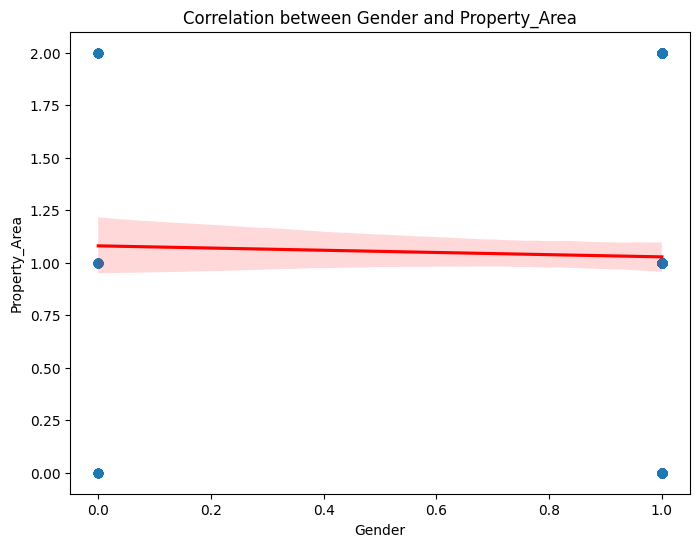

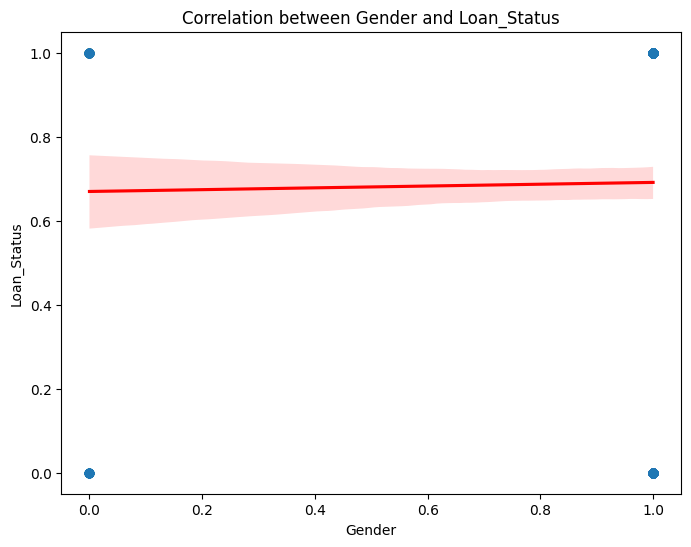

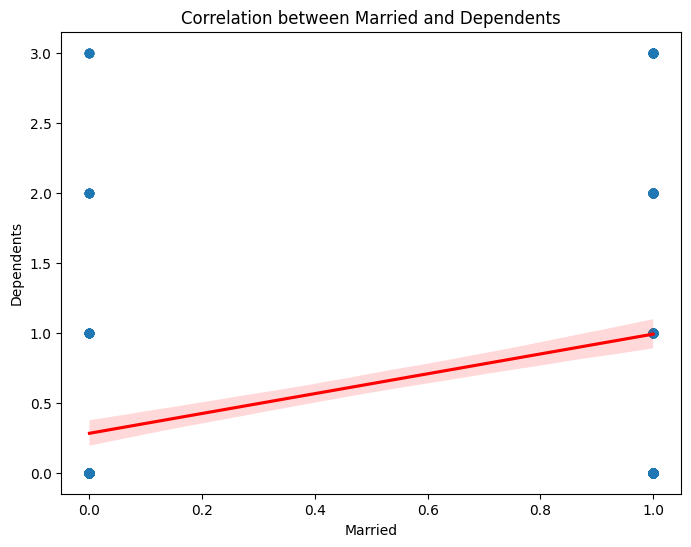

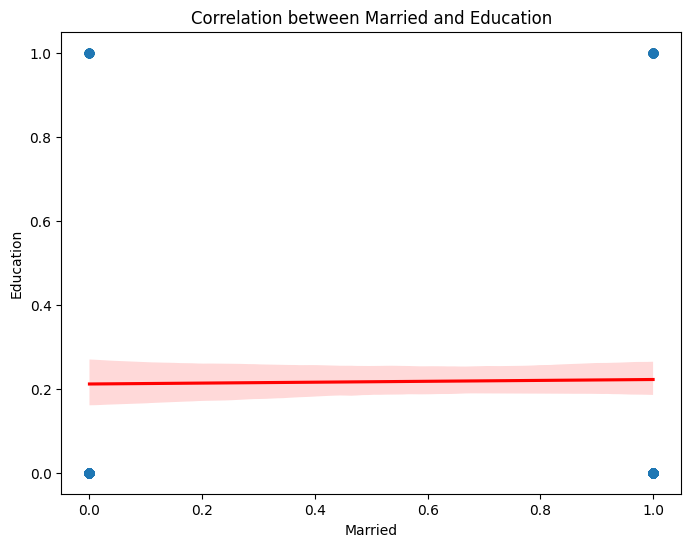

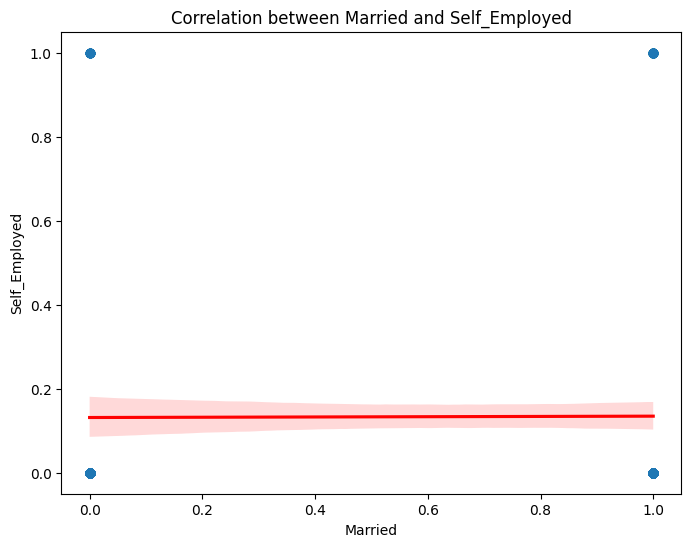

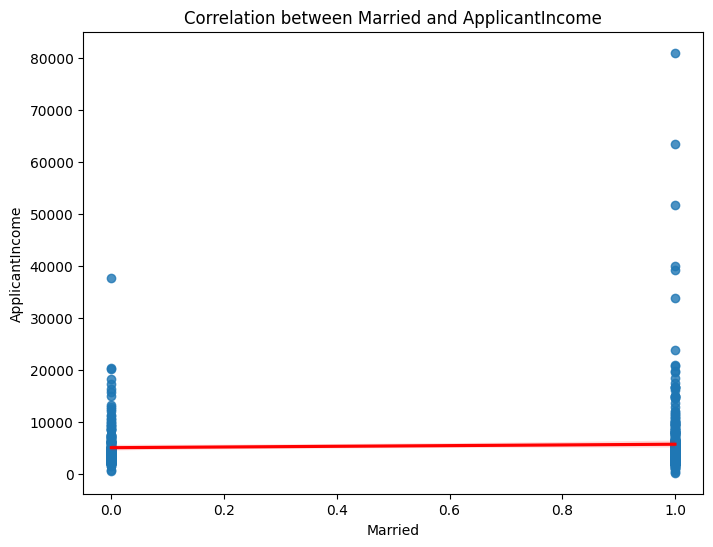

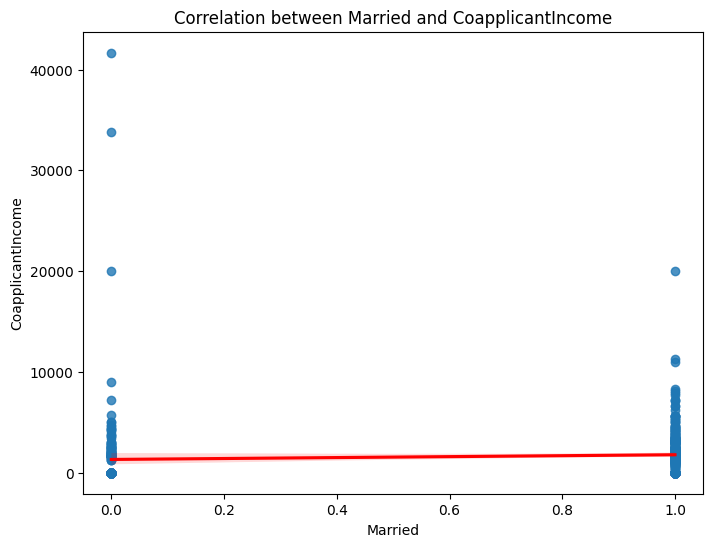

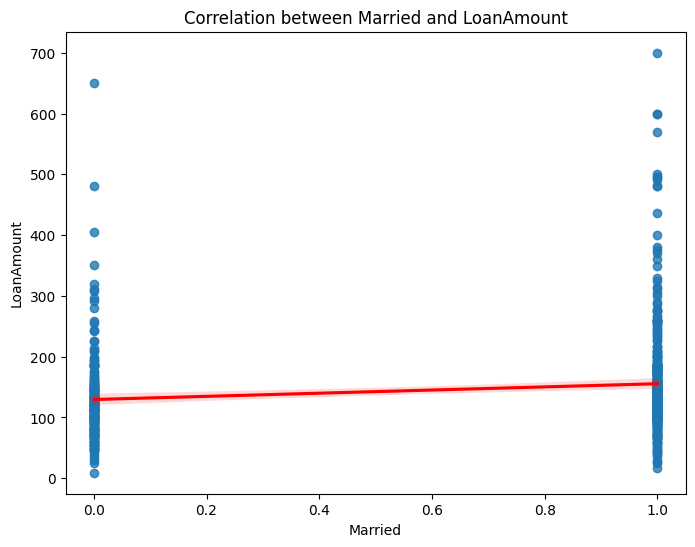

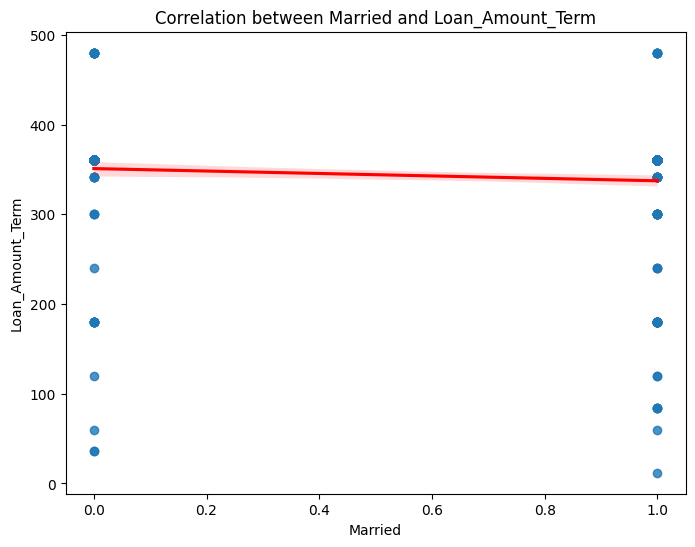

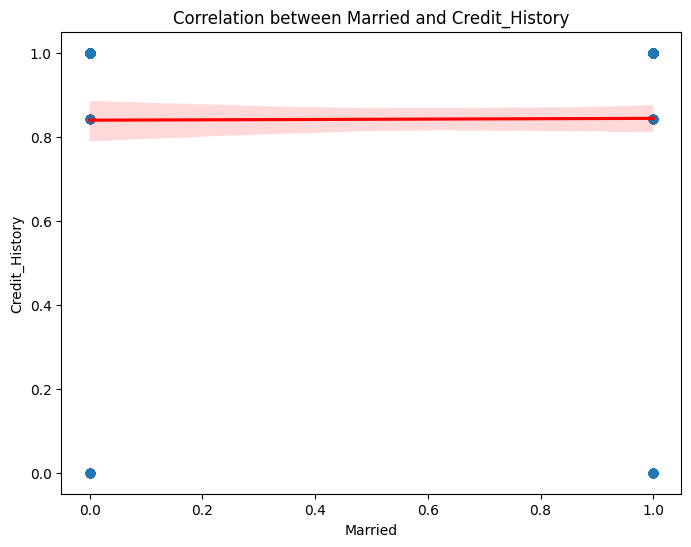

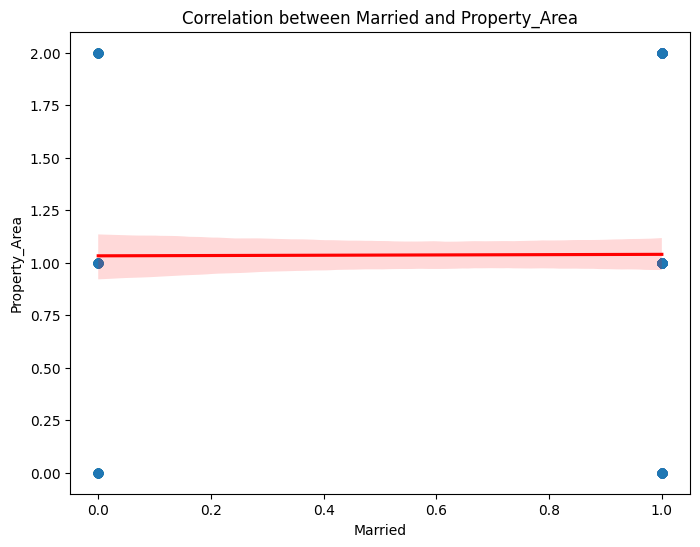

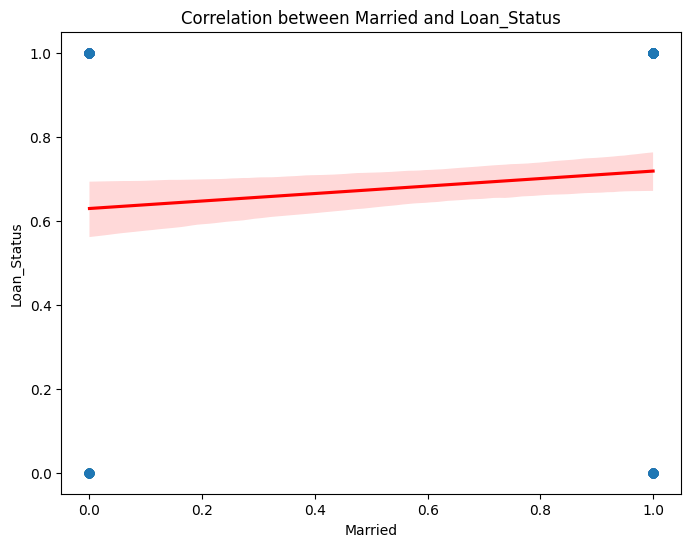

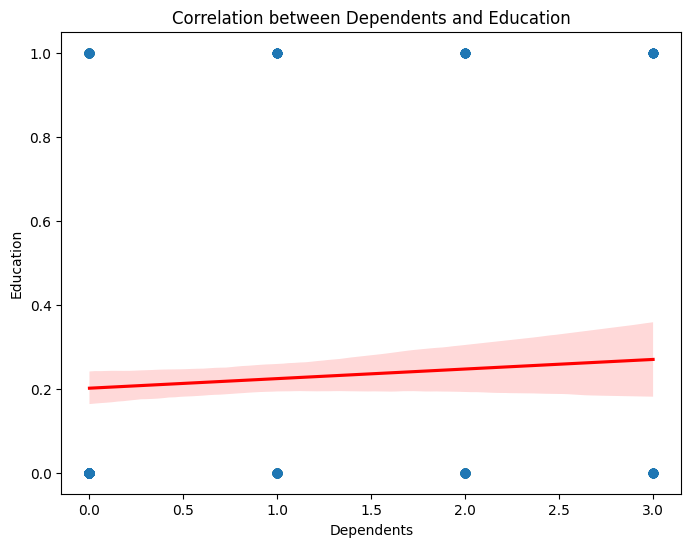

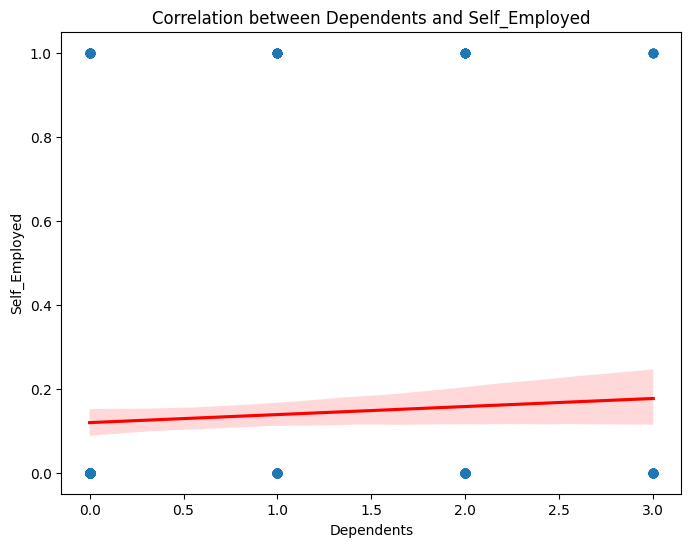

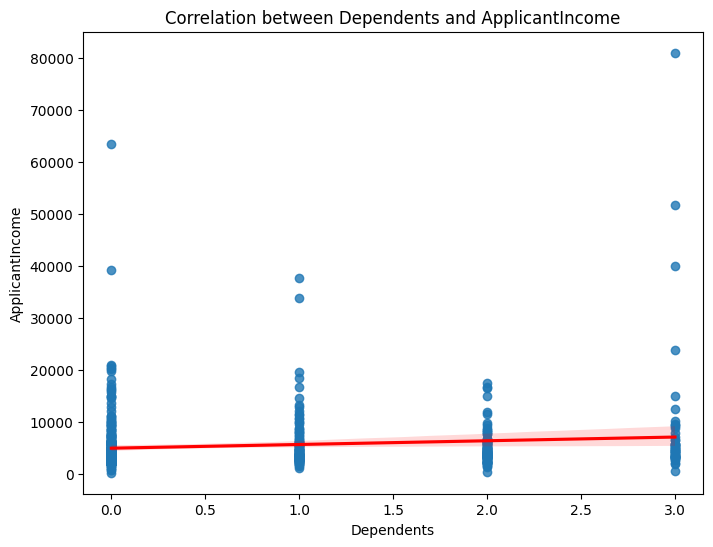

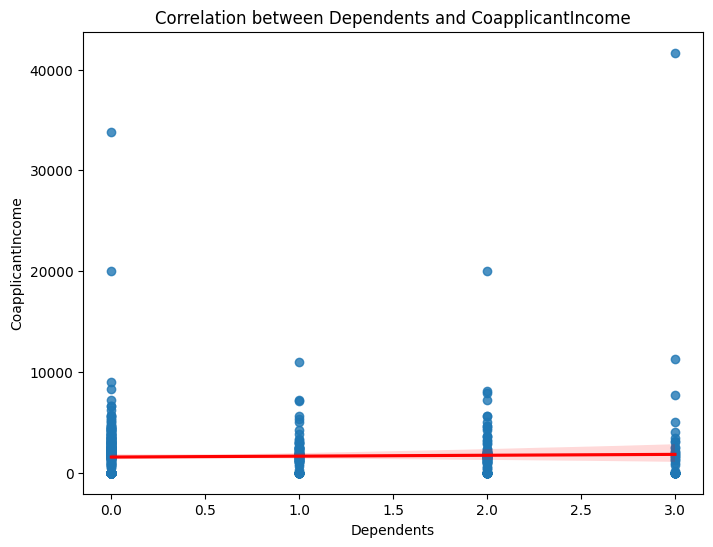

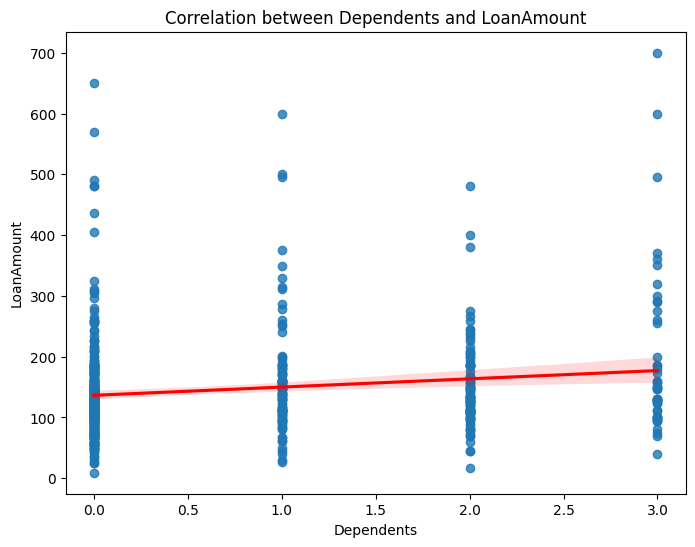

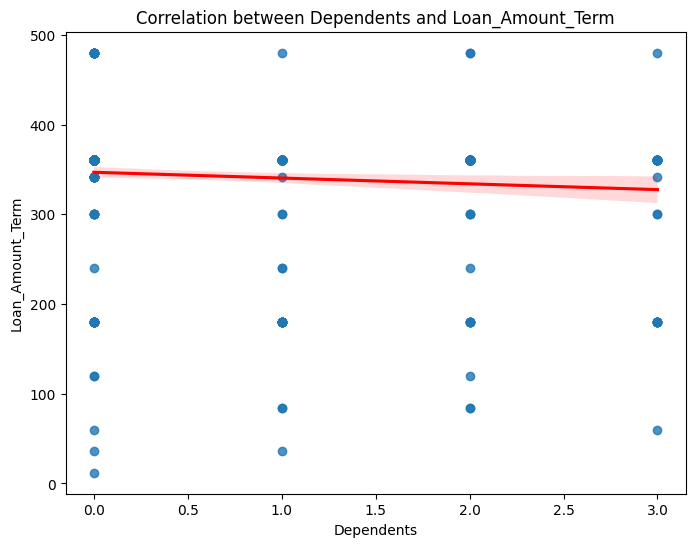

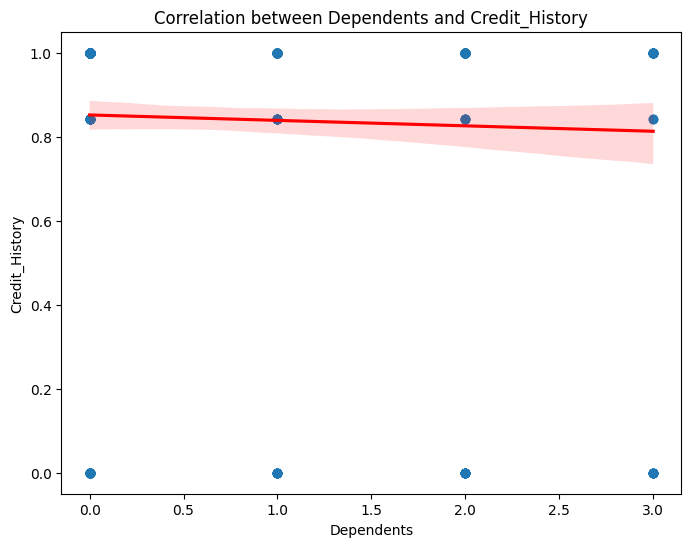

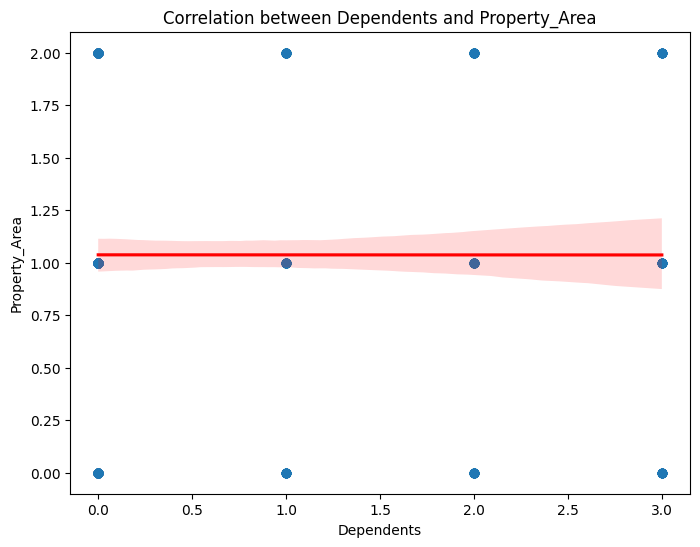

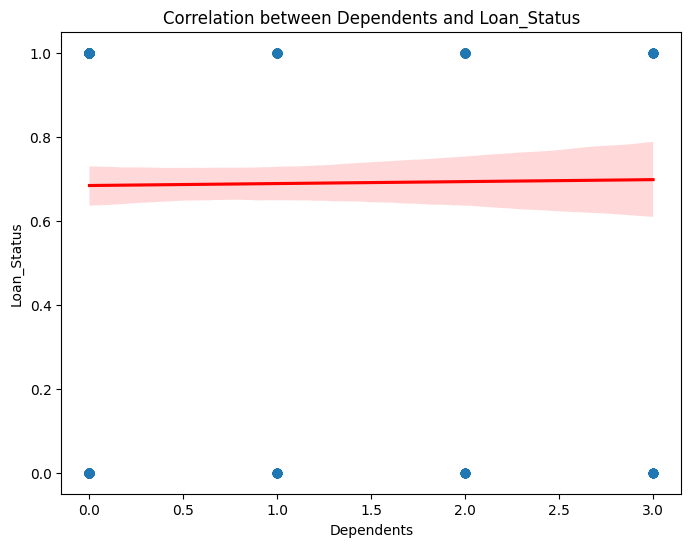

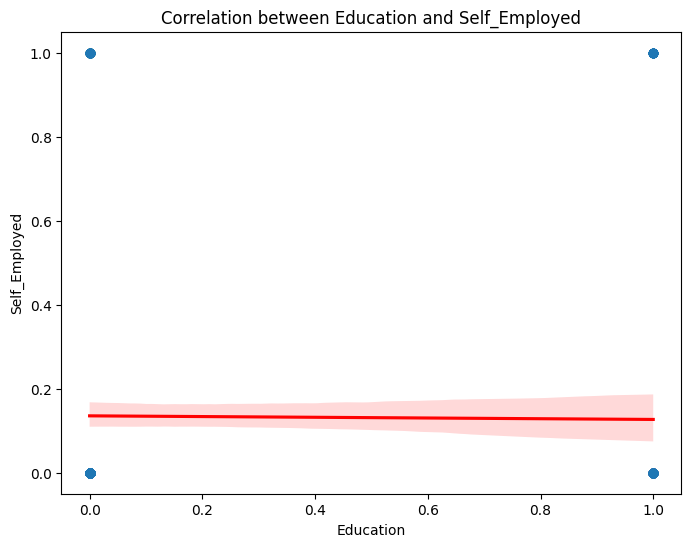

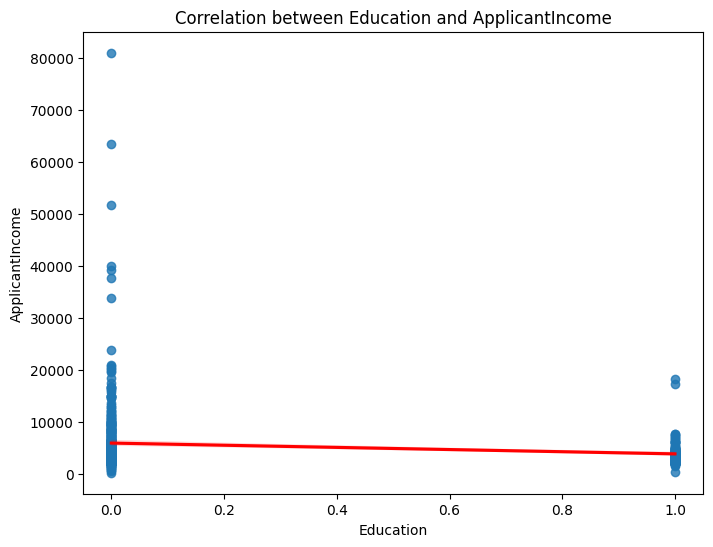

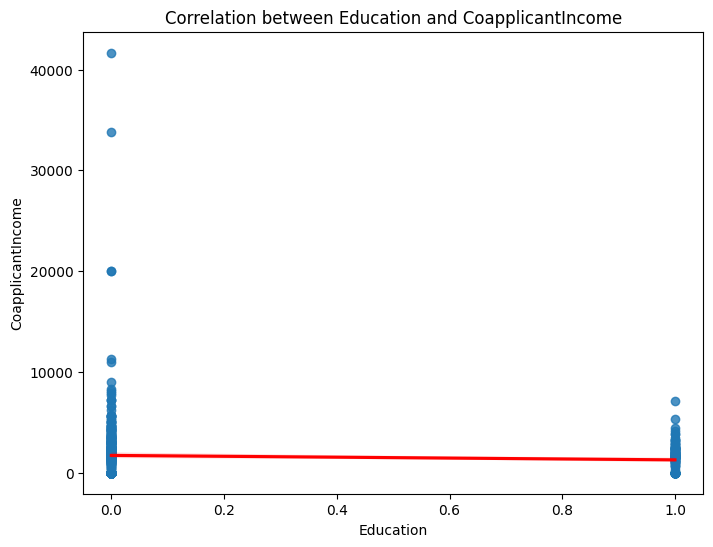

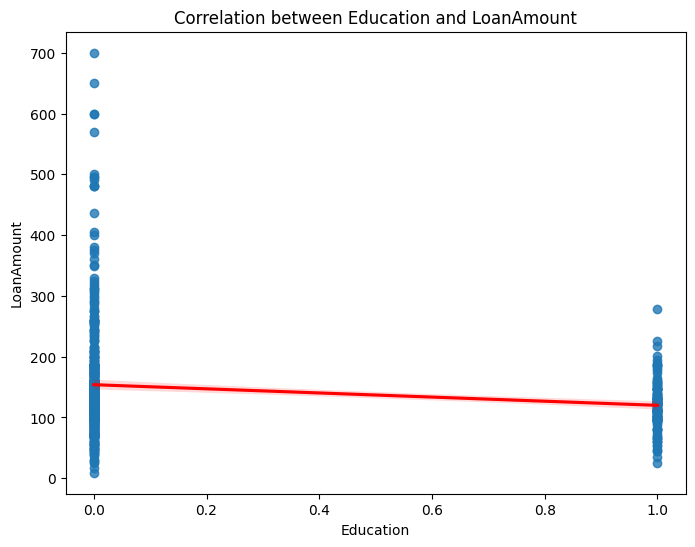

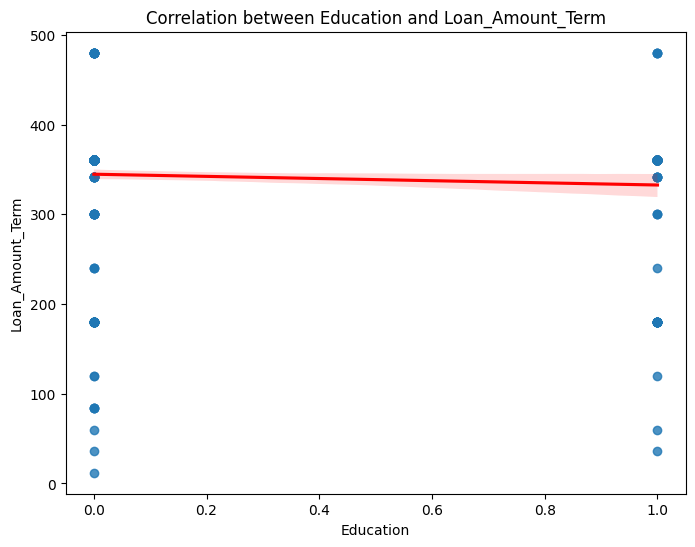

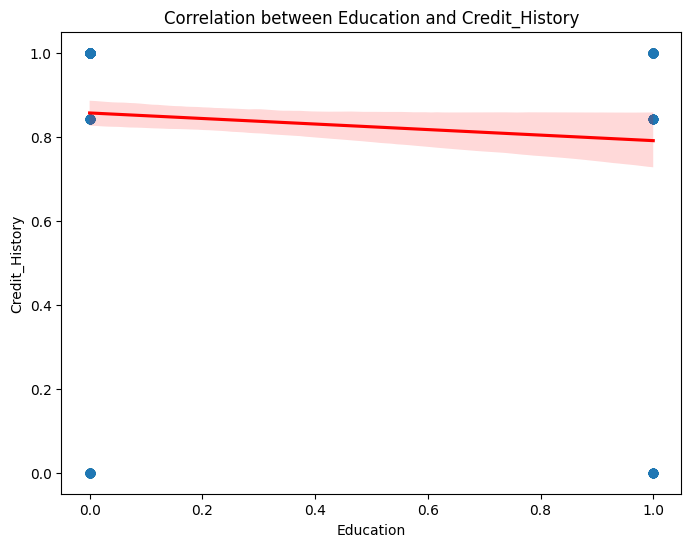

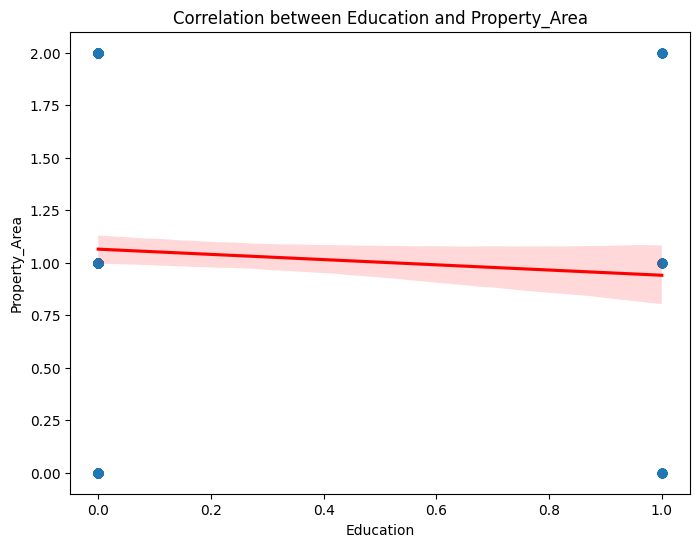

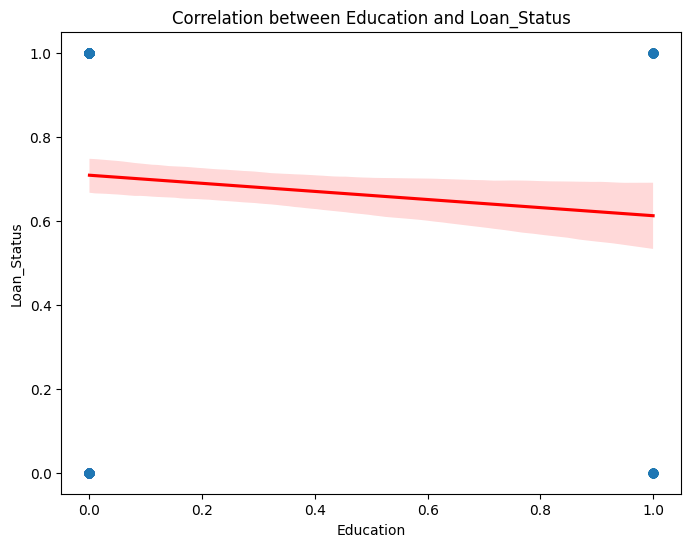

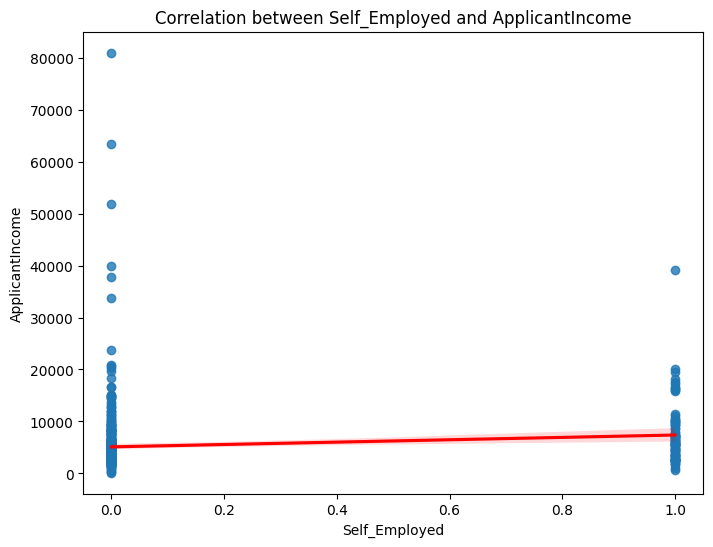

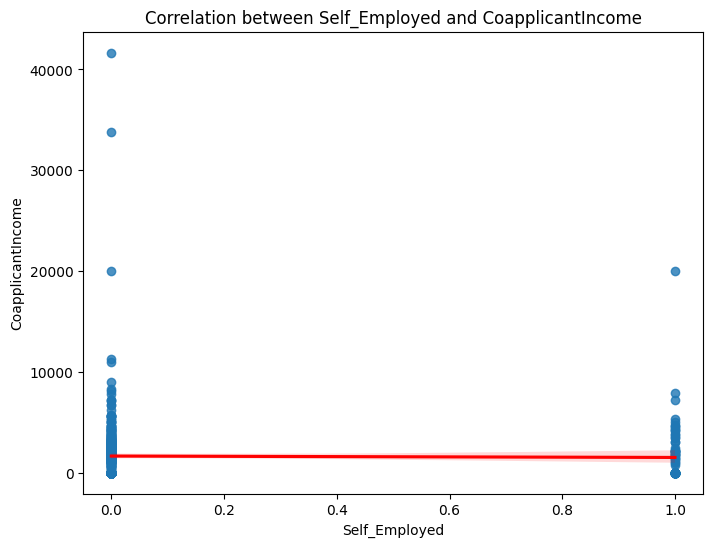

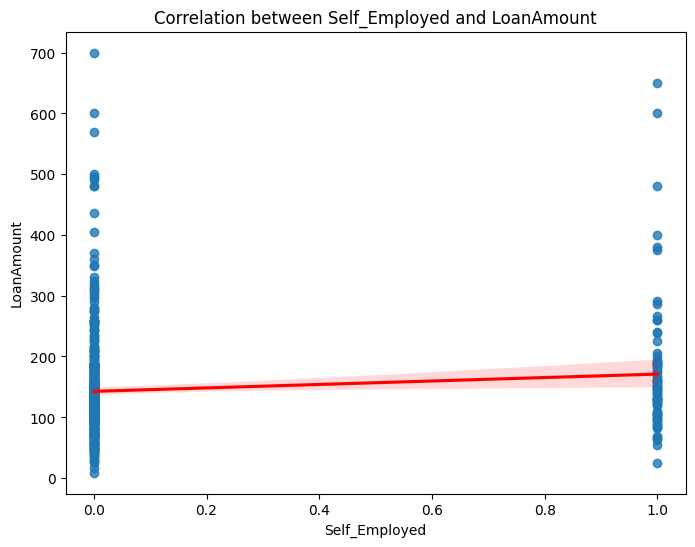

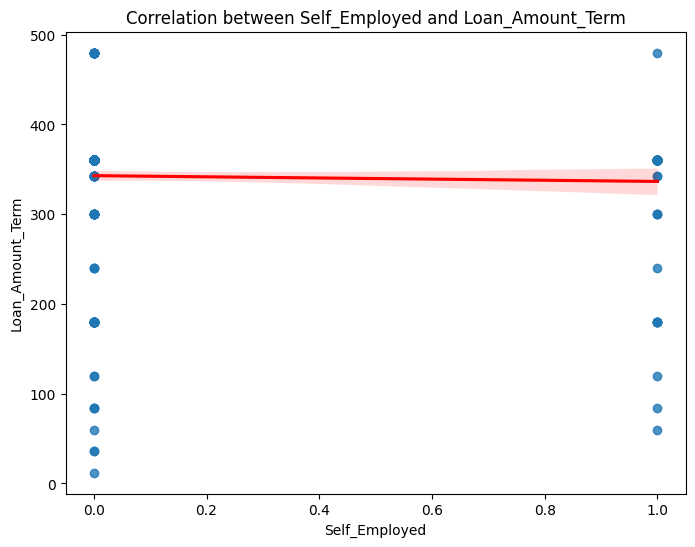

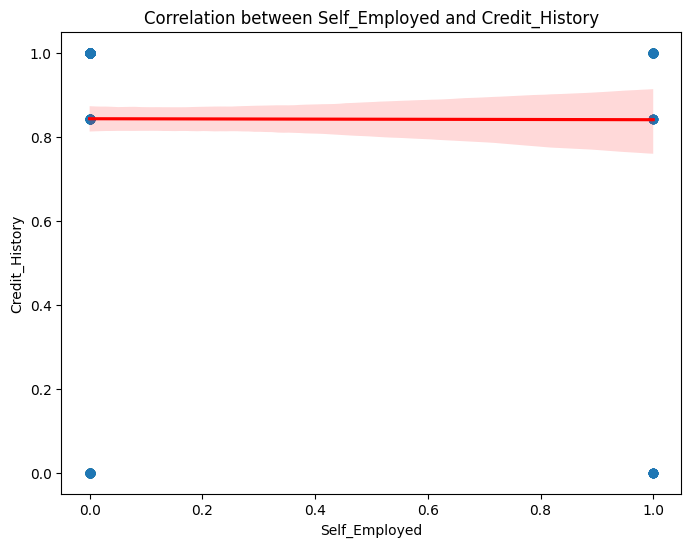

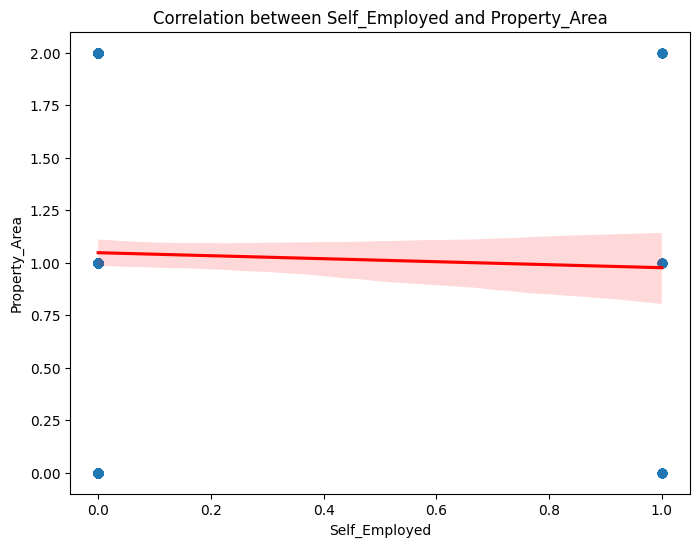

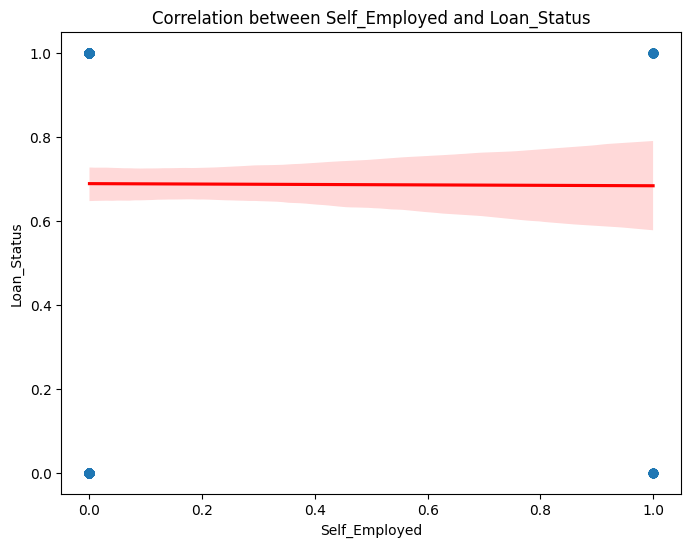

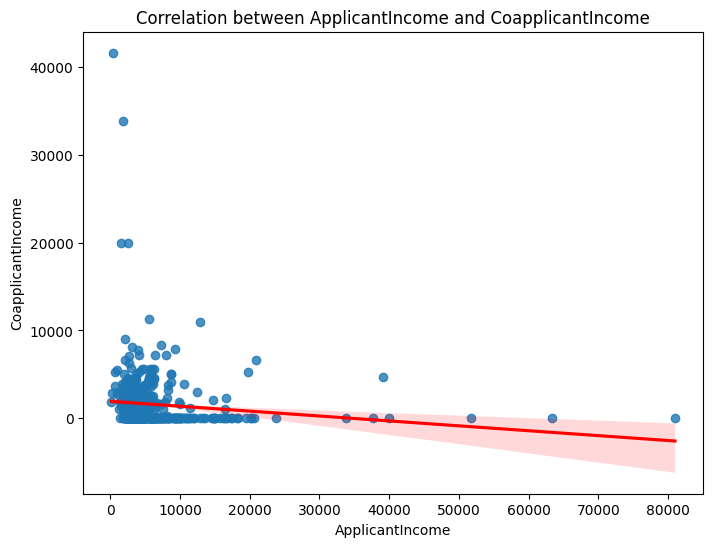

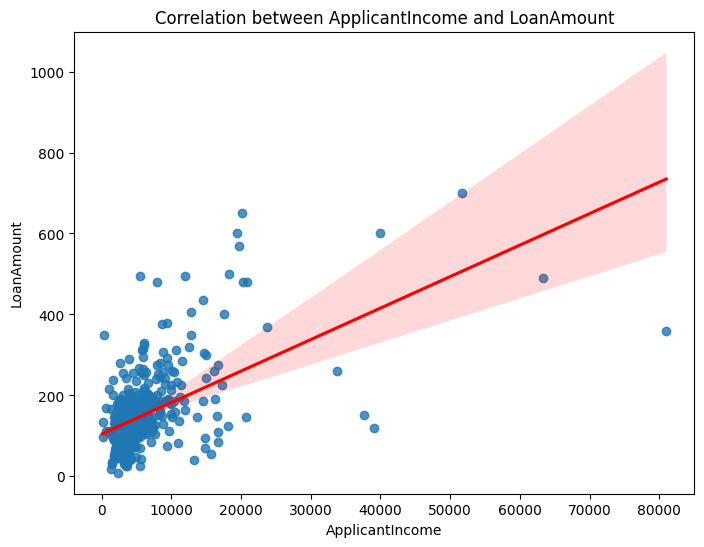

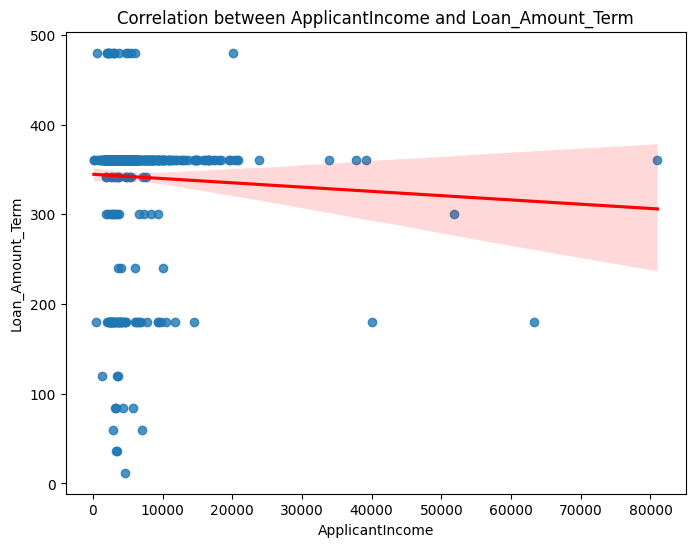

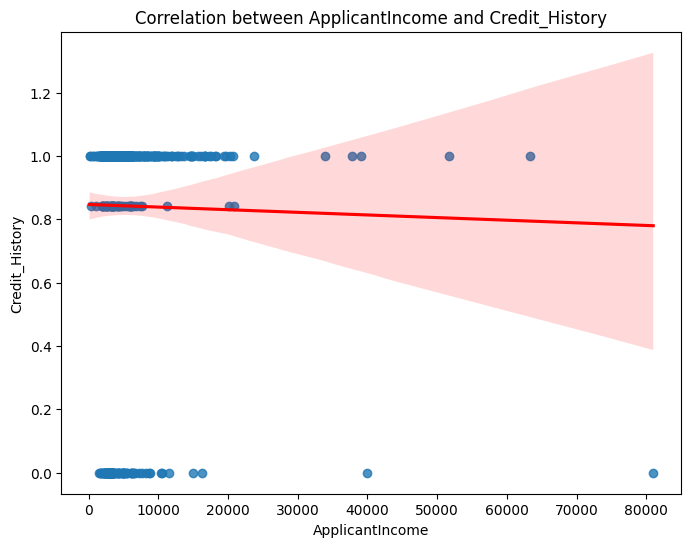

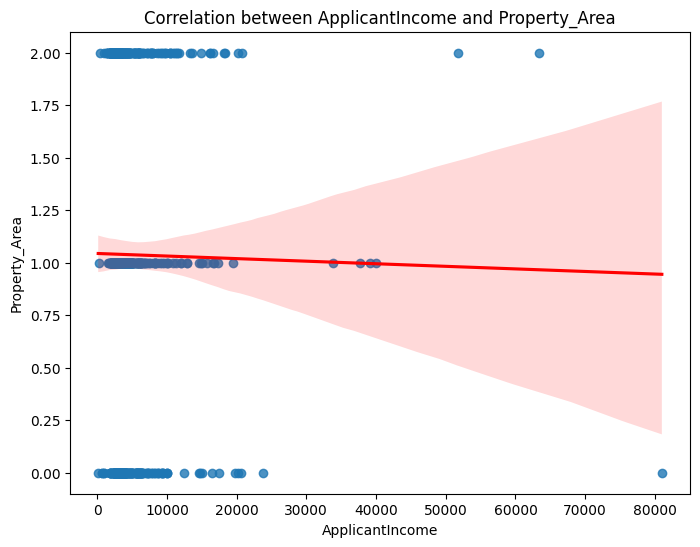

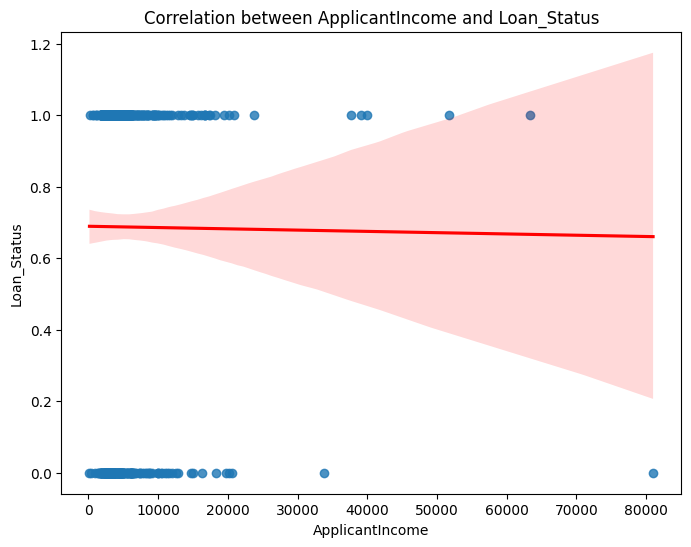

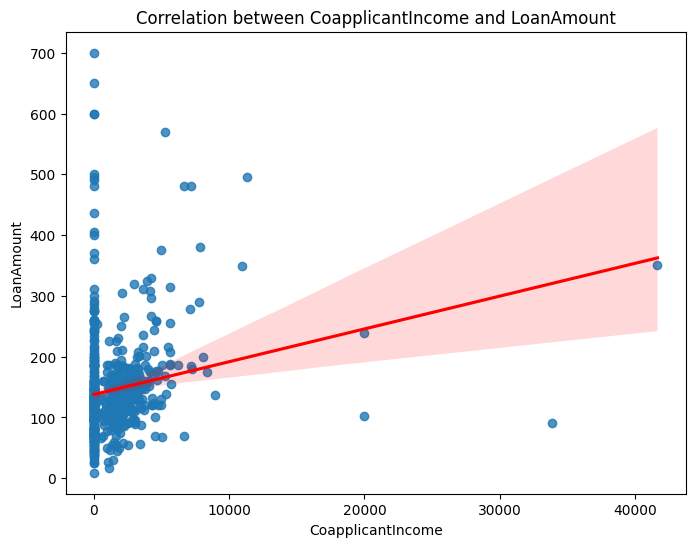

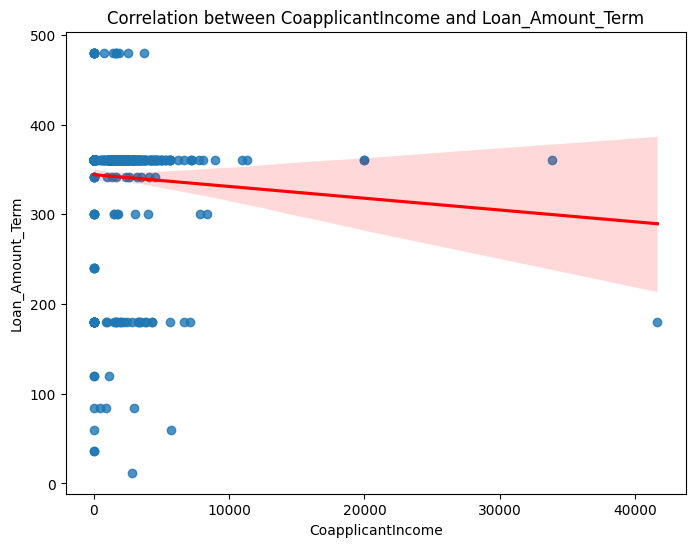

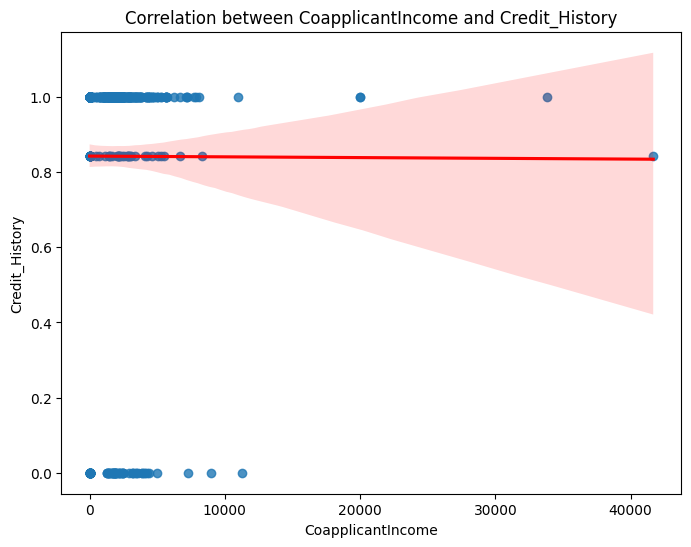

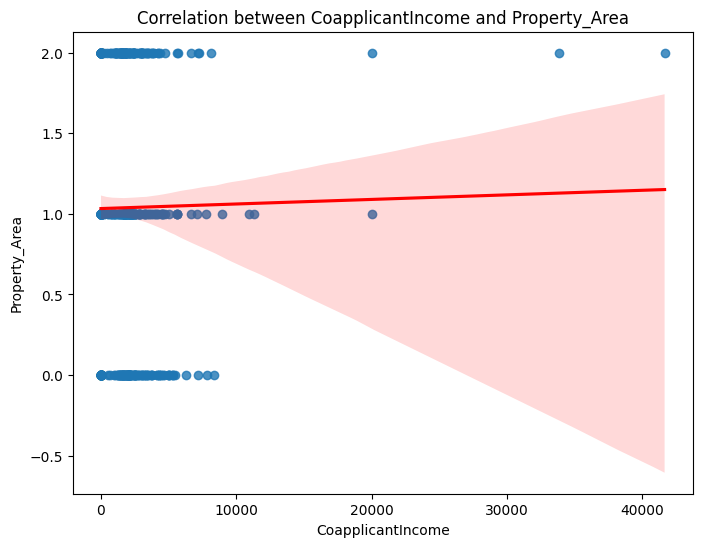

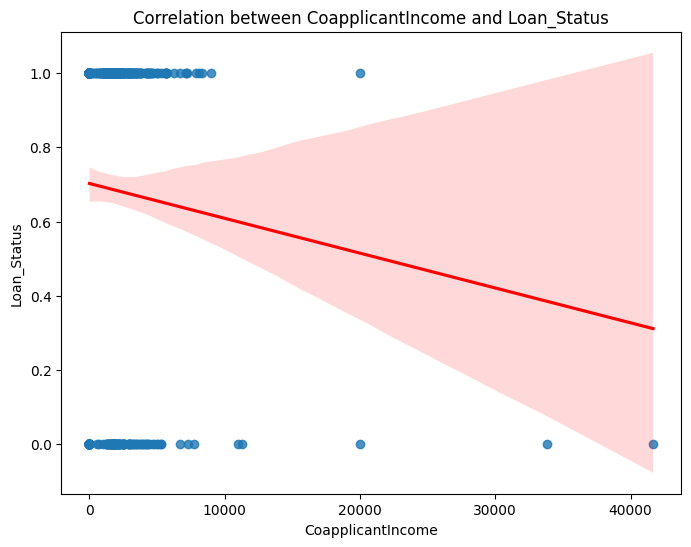

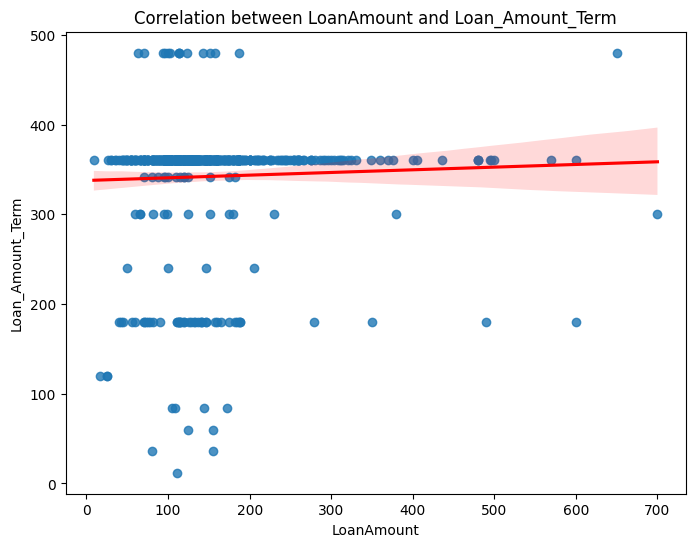

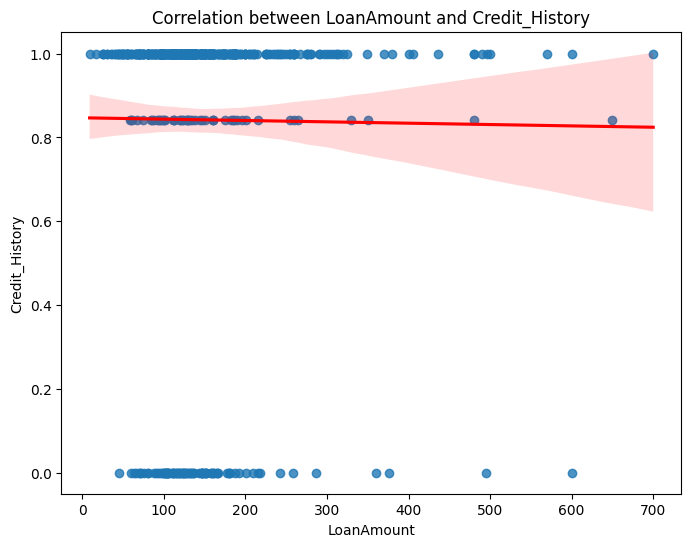

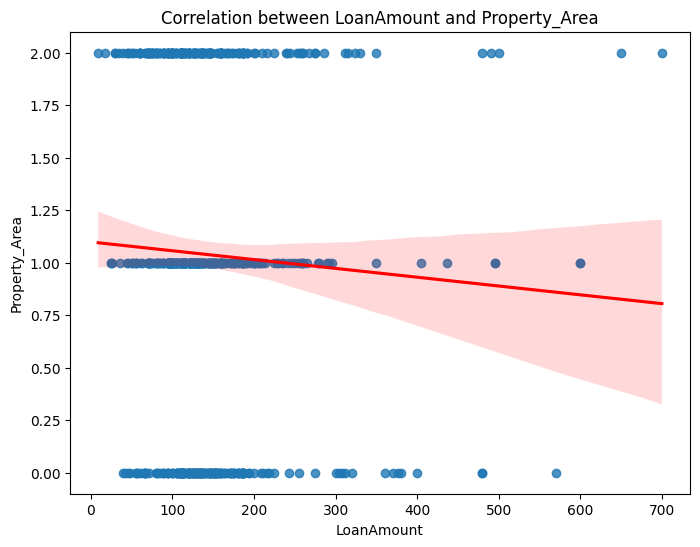

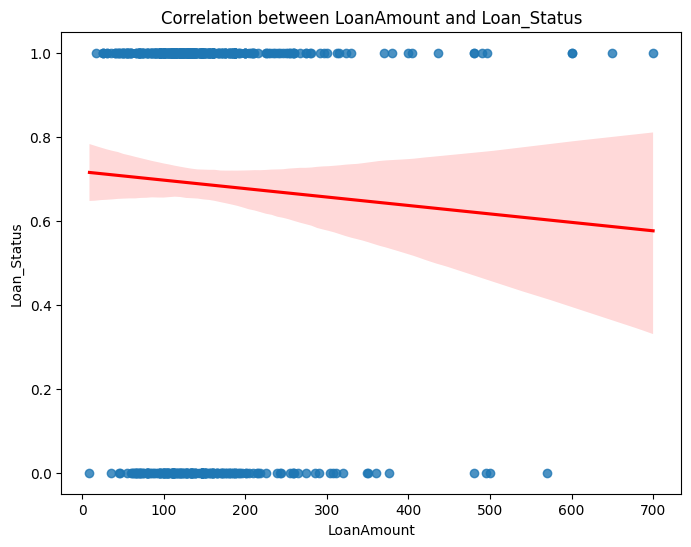

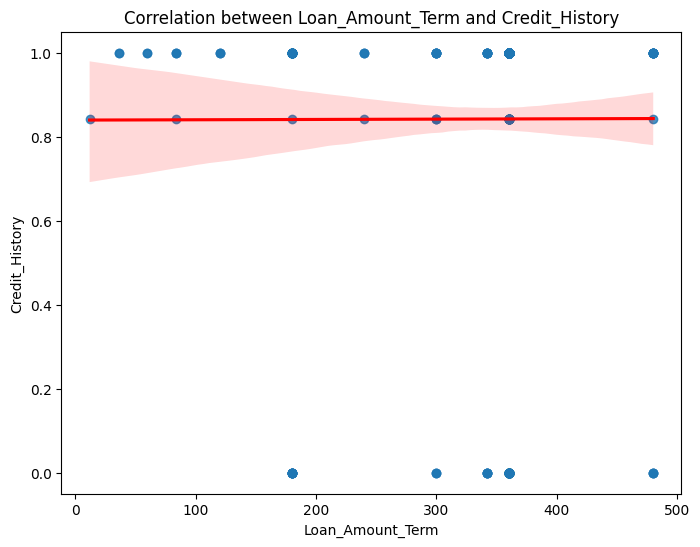

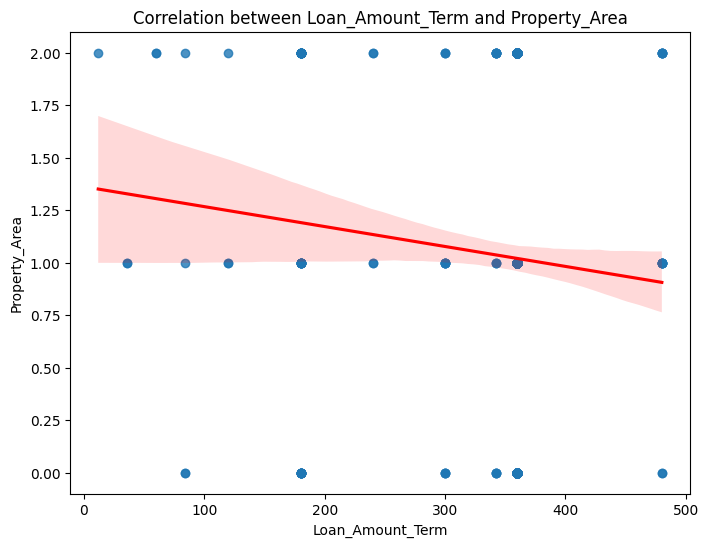

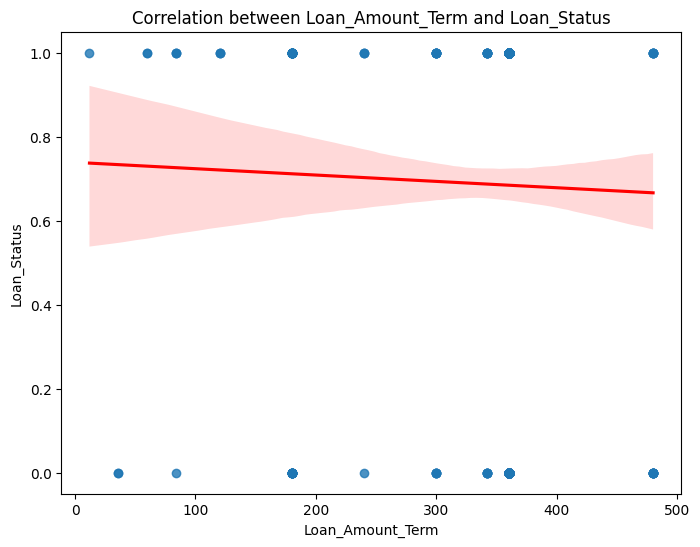

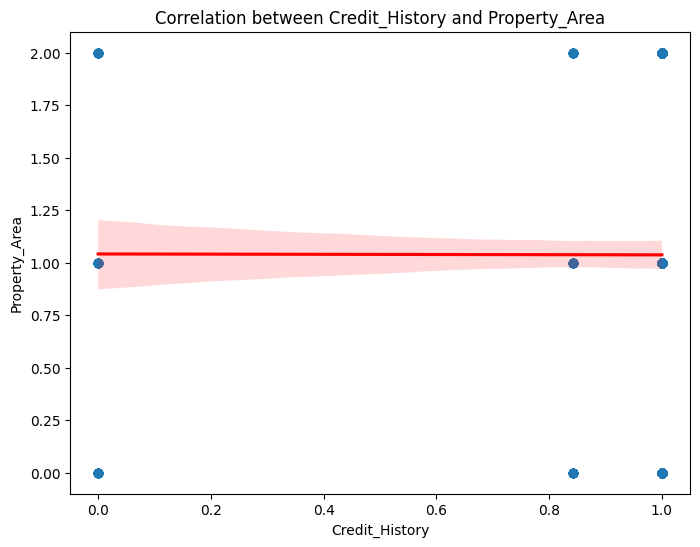

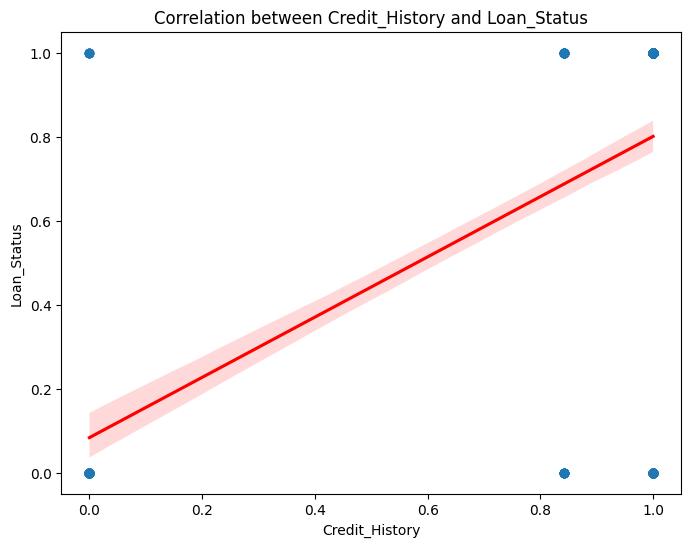

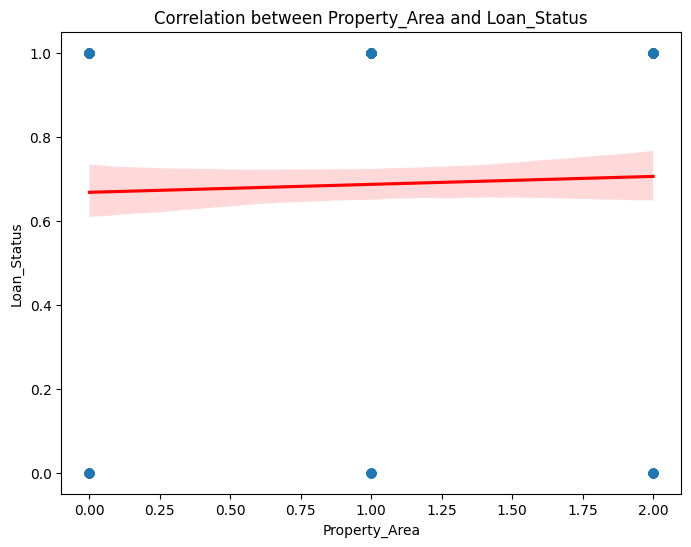

In [203]:
df_cor=df.iloc[:,1:]
# Calculate the correlation matrix
correlation_matrix = df_cor.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Create individual correlation graphs for each pair of features
for i in range(len(df_cor.columns)):
    for j in range(i + 1, len(df_cor.columns)):
        feature1 = df_cor.columns[i]
        feature2 = df_cor.columns[j]
        plt.figure(figsize=(8, 6))
        sns.regplot(x=df_cor[feature1], y=df_cor[feature2],line_kws={'color':'red'})
        plt.title(f'Correlation between {feature1} and {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [204]:
cleaned_df = df.copy()

for col in original_numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

print("Original DataFrame shape:" , df.shape)
print("Cleaned DataFrame shape:" , cleaned_df.shape)
print("ouliers numbers" , len(df) - len(cleaned_df))

Original DataFrame shape: (614, 13)
Cleaned DataFrame shape: (535, 13)
ouliers numbers 79


In [205]:
from sklearn.preprocessing import StandardScaler

#standardize numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

scaler = StandardScaler()
cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])
cleaned_df


Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001002       1        0           0          0              0   
1    LP001003       1        1           1          0              0   
2    LP001005       1        1           0          0              1   
3    LP001006       1        1           0          1              0   
4    LP001008       1        0           0          0              0   
..        ...     ...      ...         ...        ...            ...   
609  LP002978       0        0           0          0              0   
610  LP002979       1        1           3          0              0   
611  LP002983       1        1           1          0              0   
612  LP002984       1        1           2          0              0   
613  LP002990       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.969507          -0.931619    0.434462             360.0   
1           0.285790           0.130444    0.021417             360.0   
2          -0.569126          -0.931619   -1.369448             360.0   
3          -0.794331           0.729088   -0.158050             360.0   
4           1.051056          -0.931619    0.313050             360.0   
..               ...                ...         ...               ...   
609        -0.623132          -0.931619   -1.257281             360.0   
610         0.028181          -0.931619   -1.952714             180.0   
611         2.170062          -0.762591    2.825579             360.0   
612         1.905972          -0.931619    1.344982             360.0   
613         0.285790          -0.931619    0.133583             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2            1  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[535 rows x 13 columns]

note that outliers on the right side we mentioned before are not shown up in the following histograms:

note the difference between ranges before and after standardization, henece that the step of standardization comes after outliers removing that is to guarantee that the outliers would not affect the mean and standard deviation.

note that we did not standardiz the loan_amount_term, beacause that depends on the model that will be used, and i found out that it has no effect on correlation matrix results

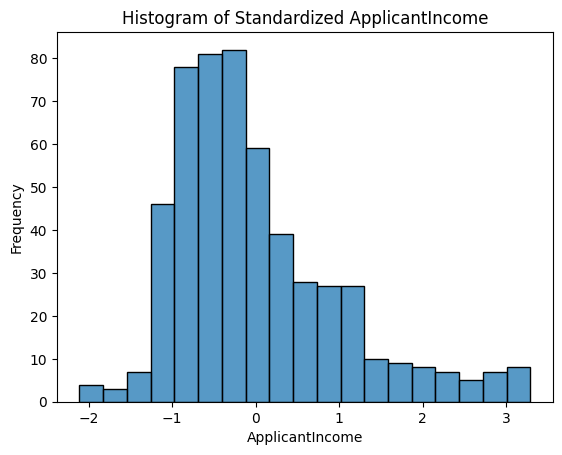

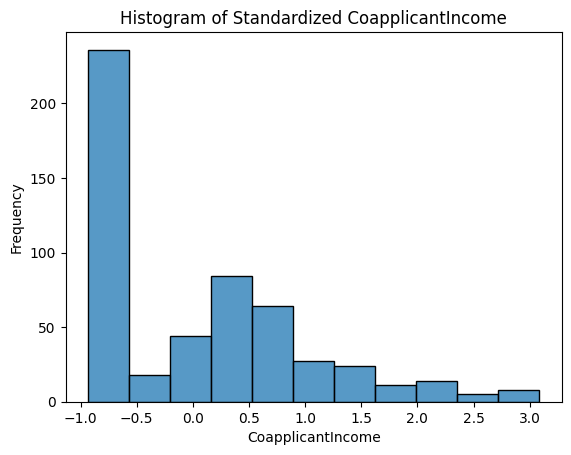

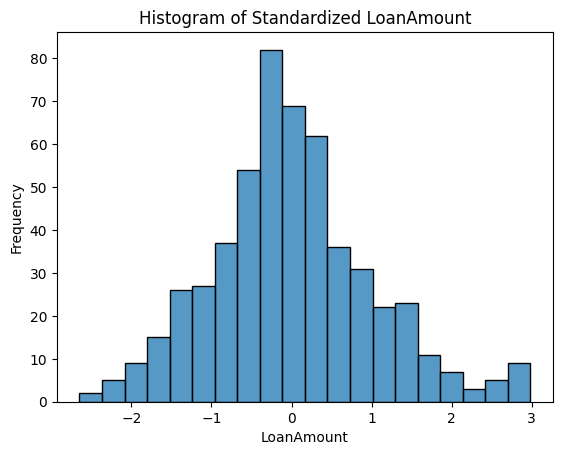

In [206]:
# Plotting histograms for standardized numerical data
for col in numerical_cols:
  sns.histplot(cleaned_df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of Standardized {col}') # Added title for clarity
  plt.show()

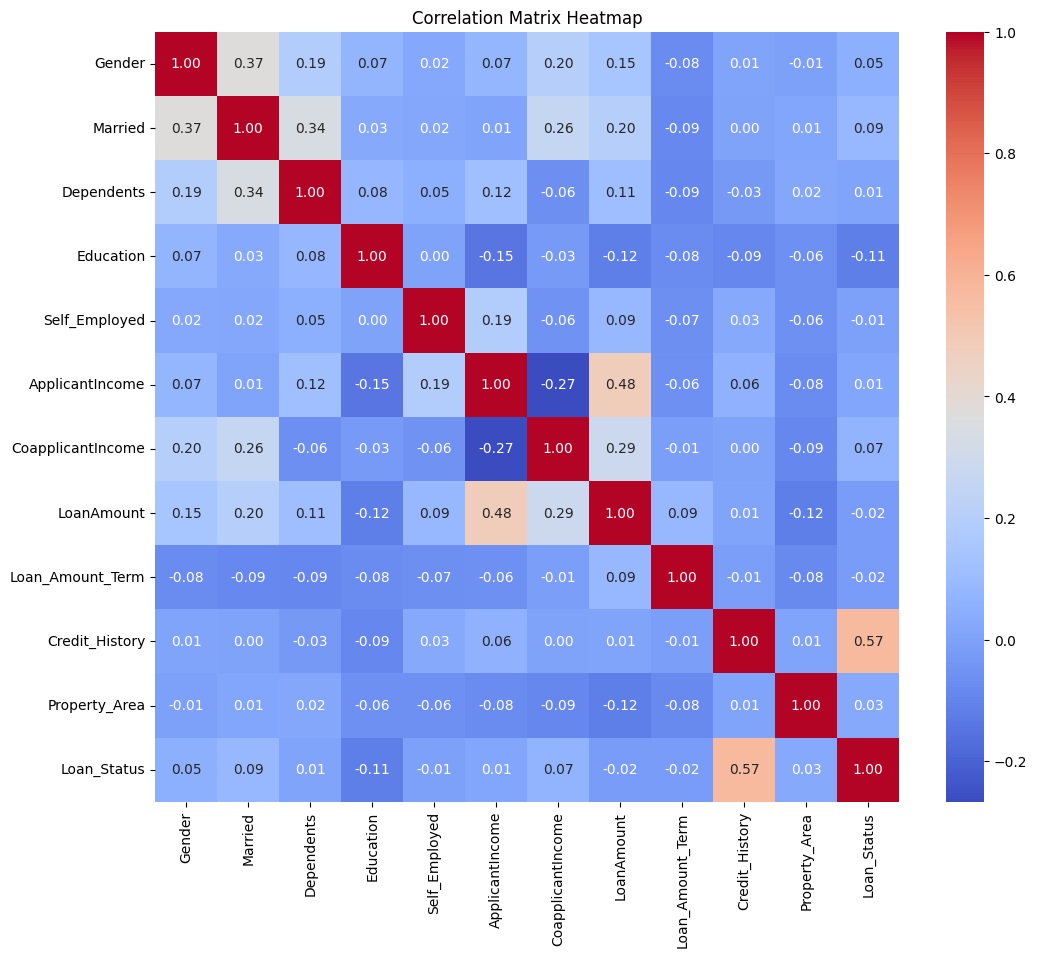

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = cleaned_df.iloc[:,1:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

notice the features that have the same correlation which means its outliers was not infeluencing(credit_history, Loan_status), mean while others has slight drop in the correlation but not too far (applicantIncome, LoanAmount)

<Figure size 1000x800 with 0 Axes>

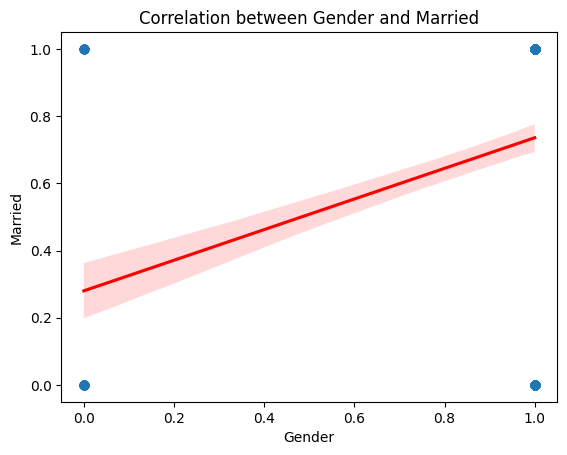

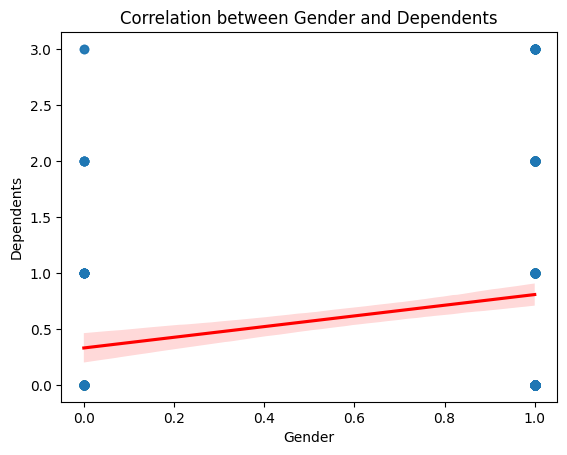

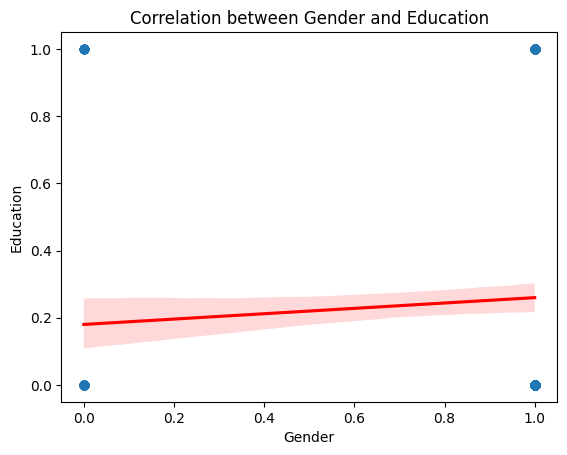

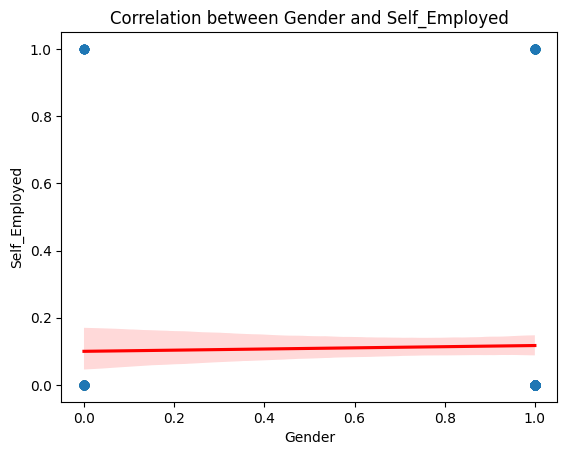

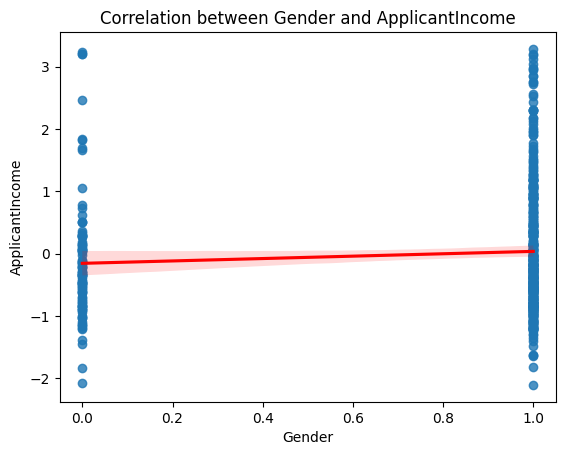

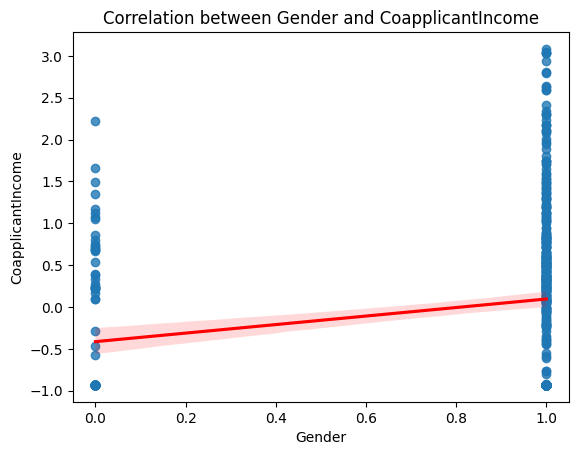

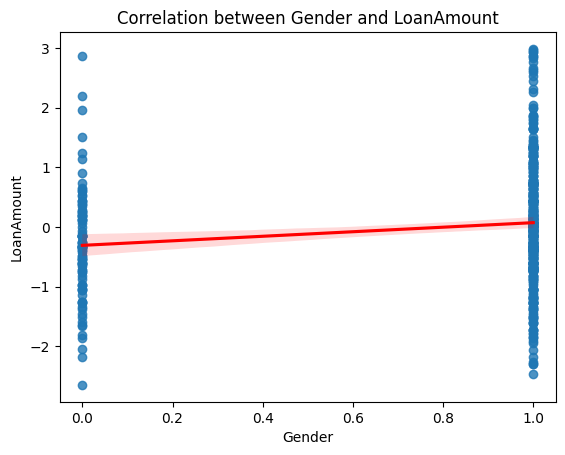

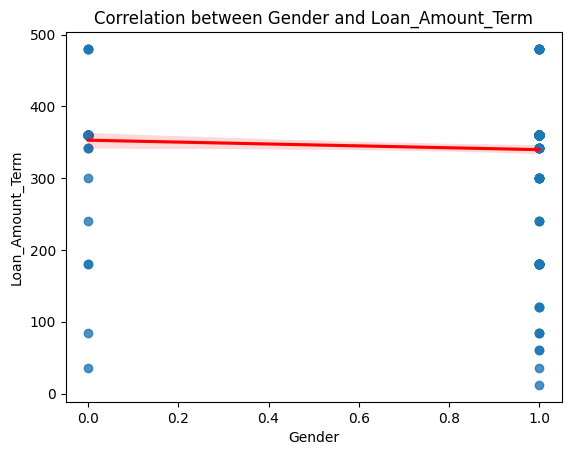

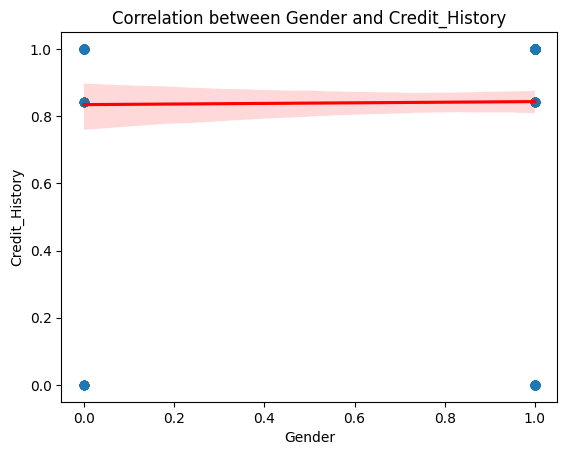

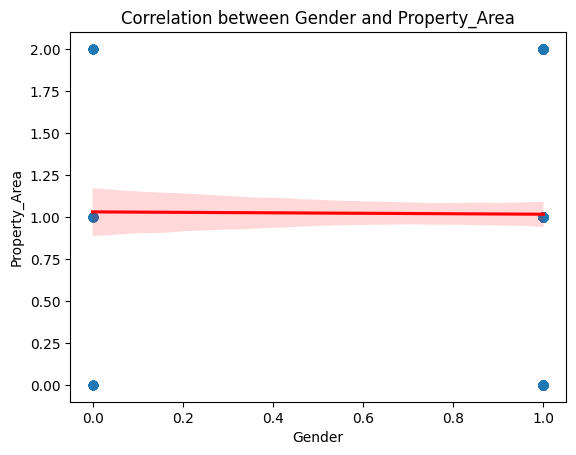

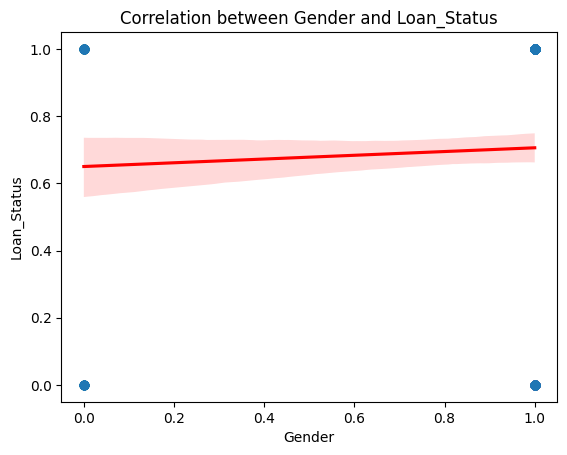

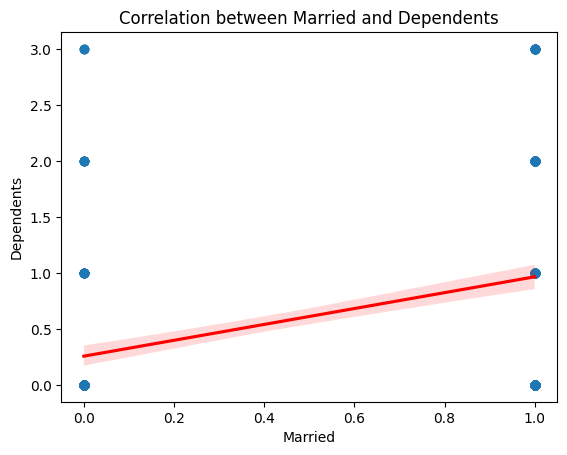

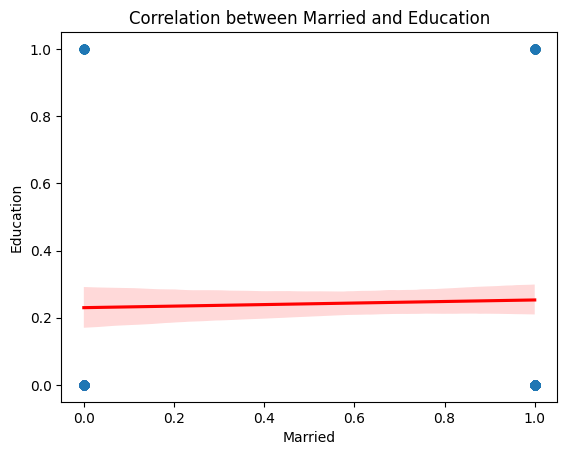

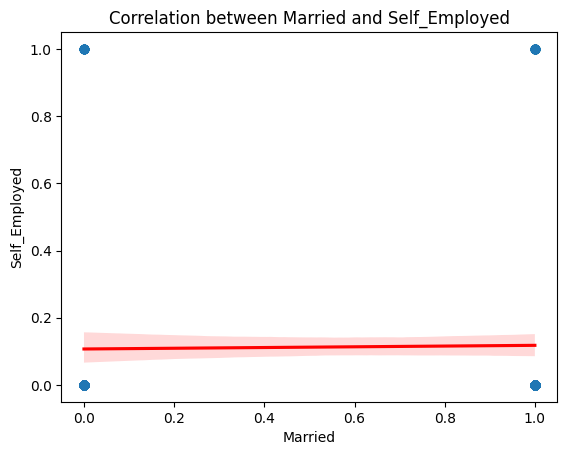

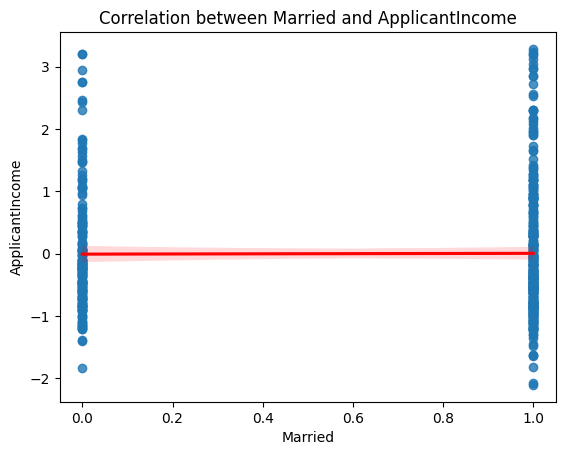

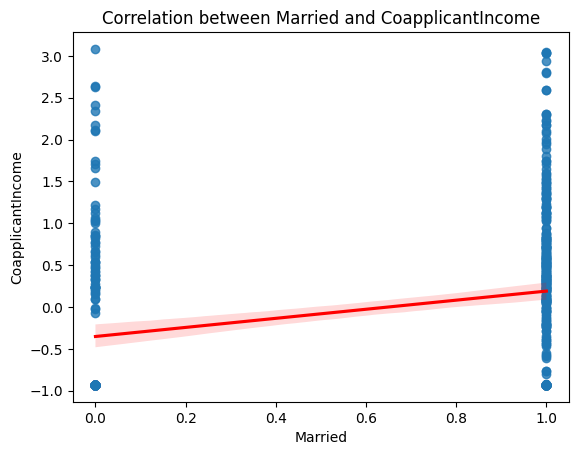

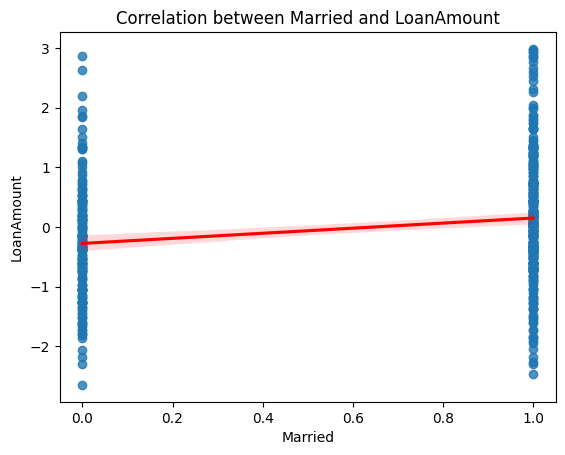

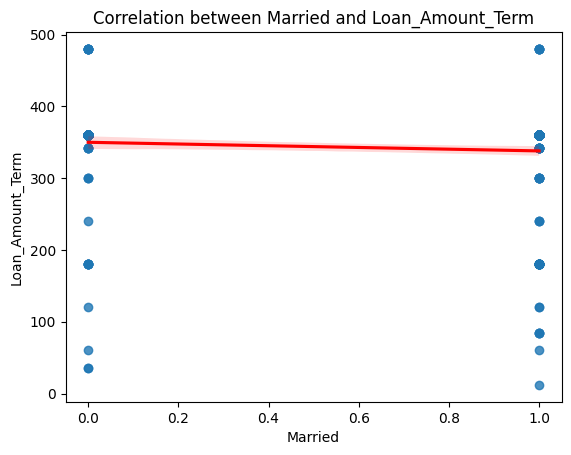

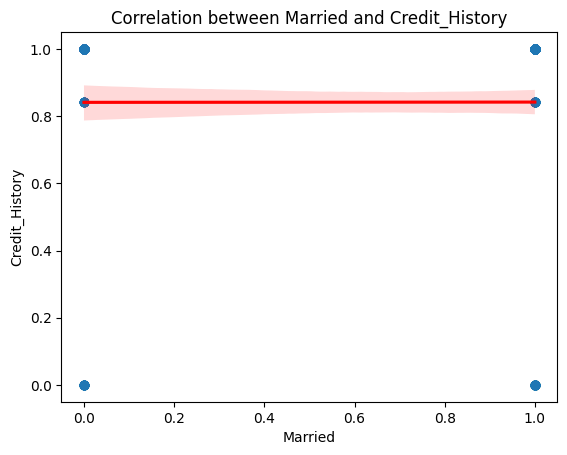

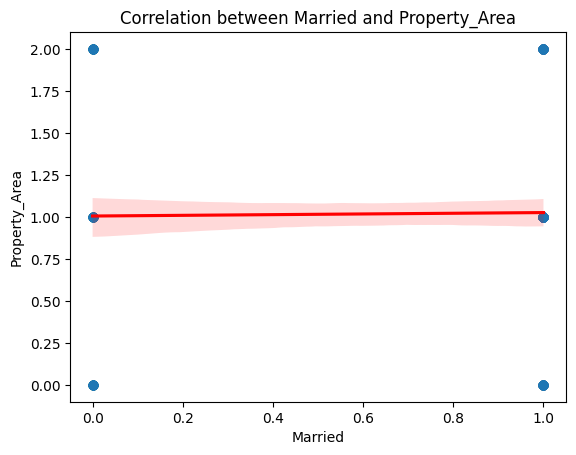

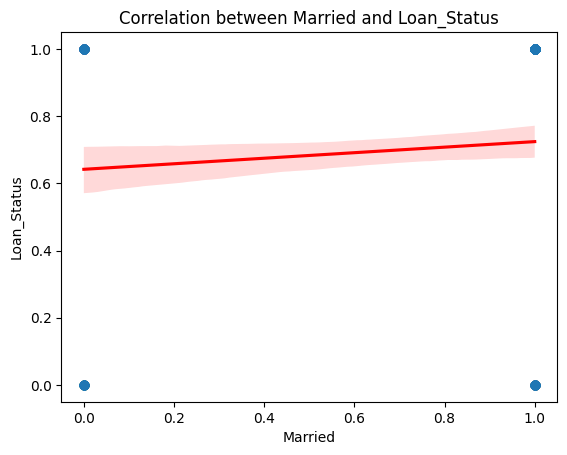

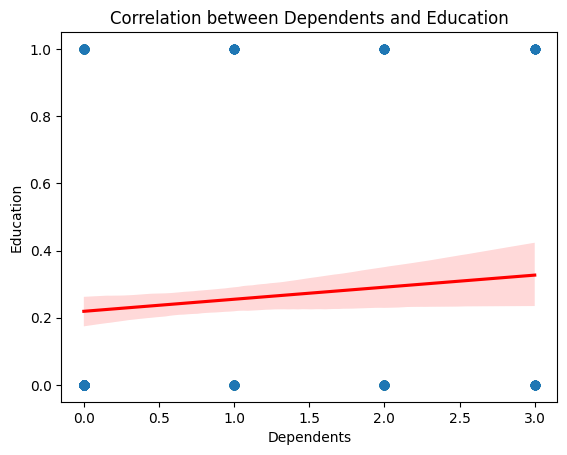

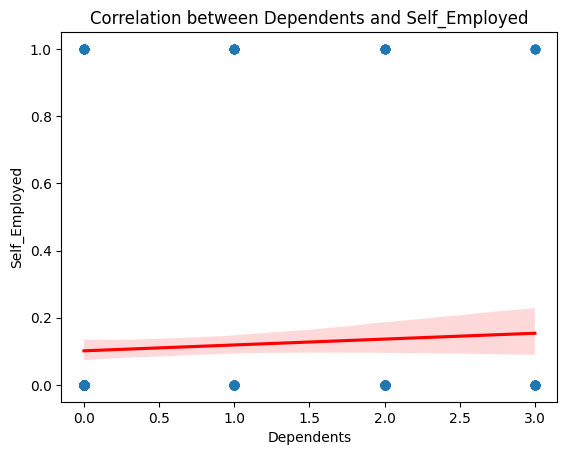

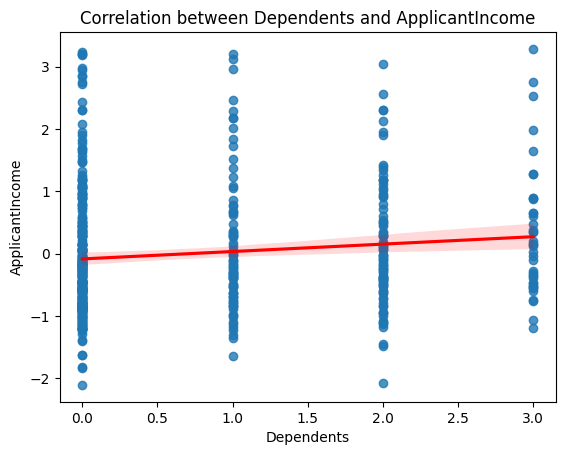

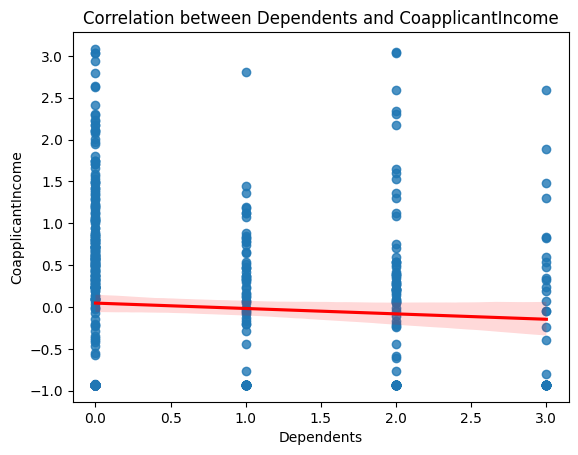

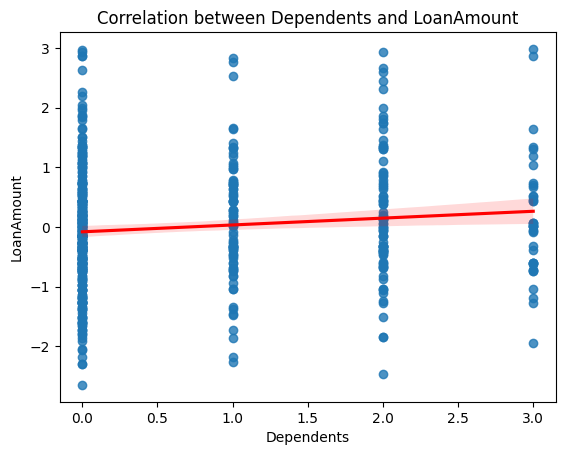

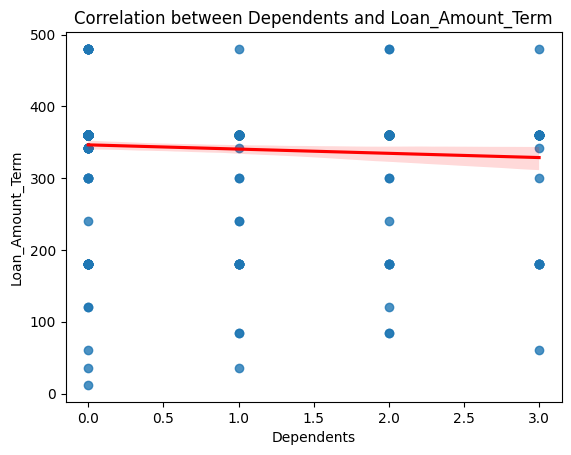

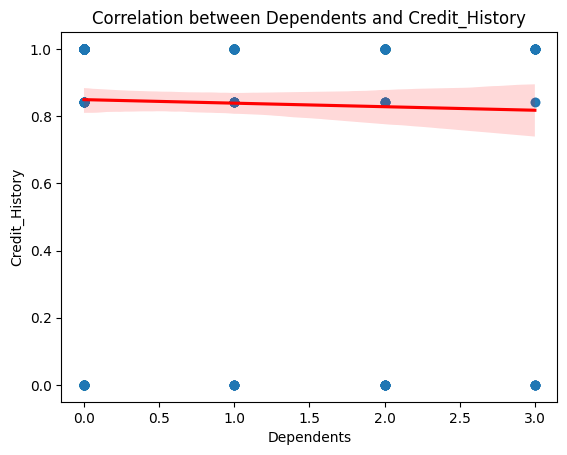

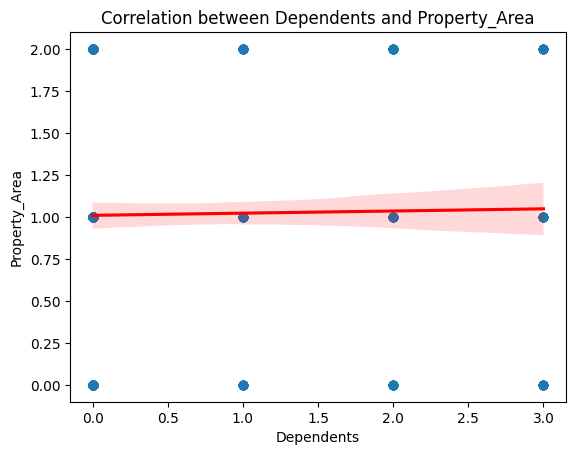

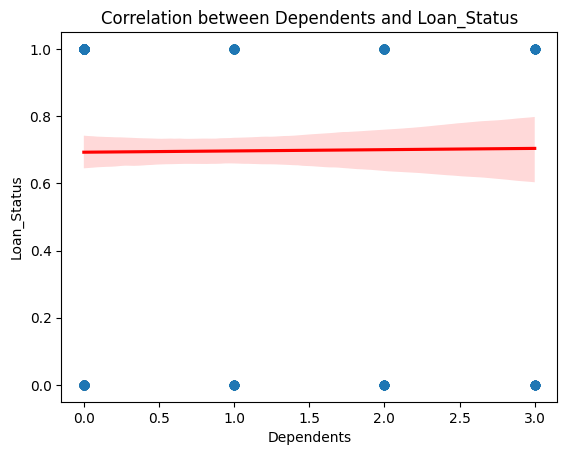

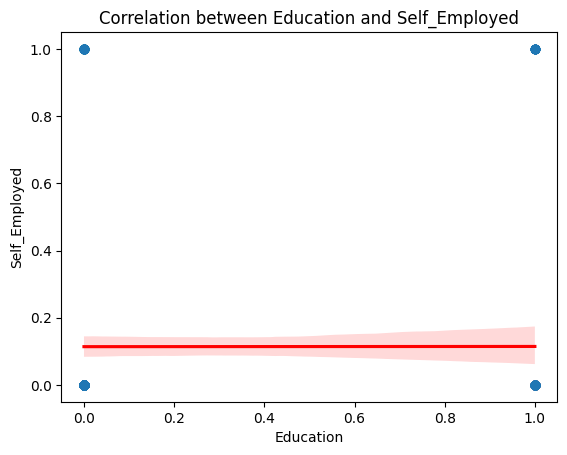

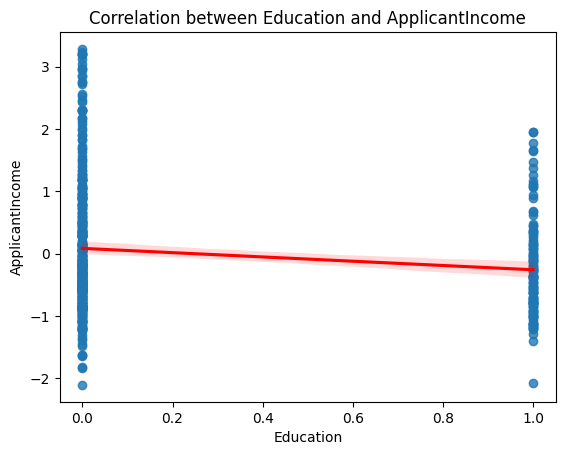

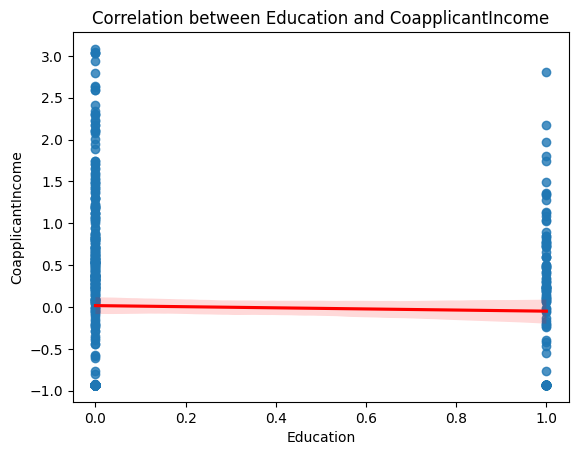

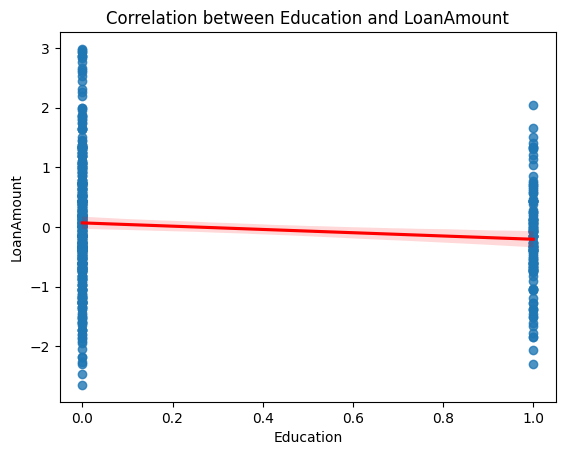

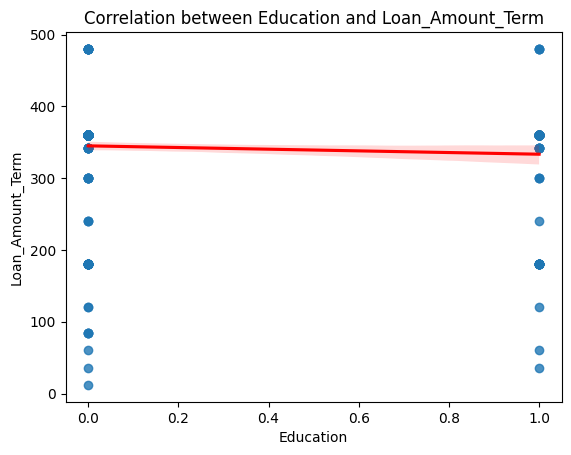

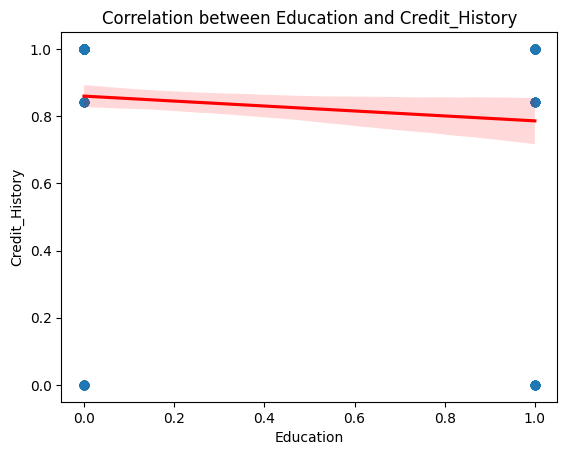

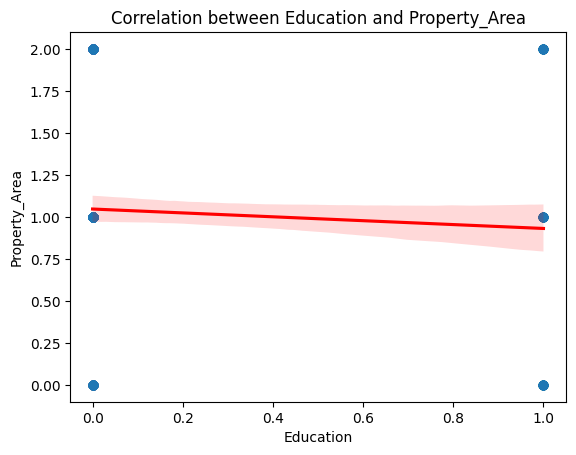

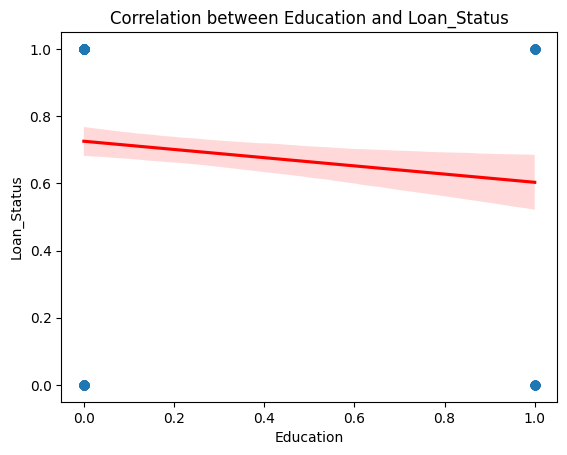

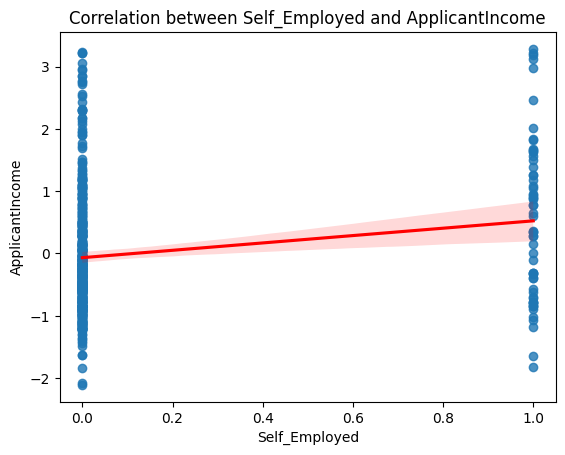

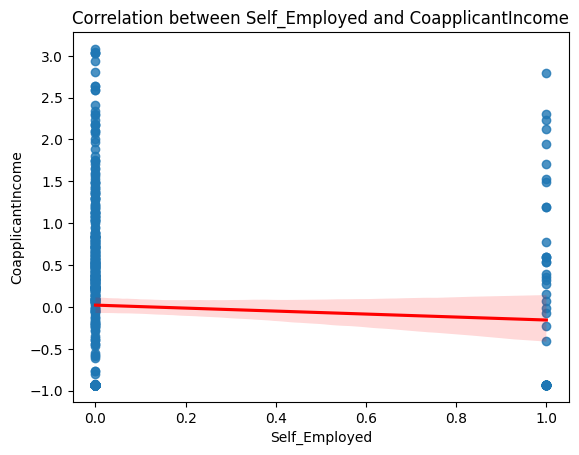

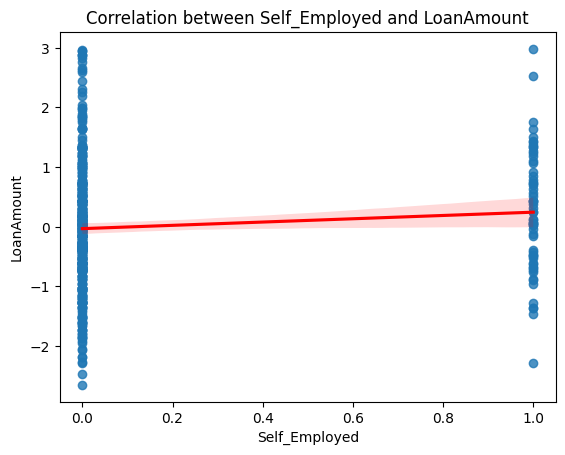

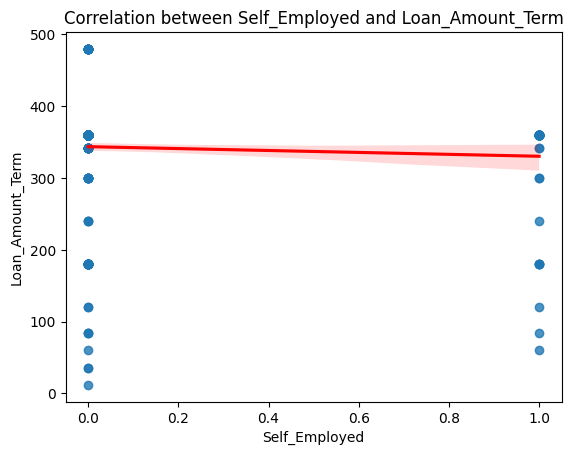

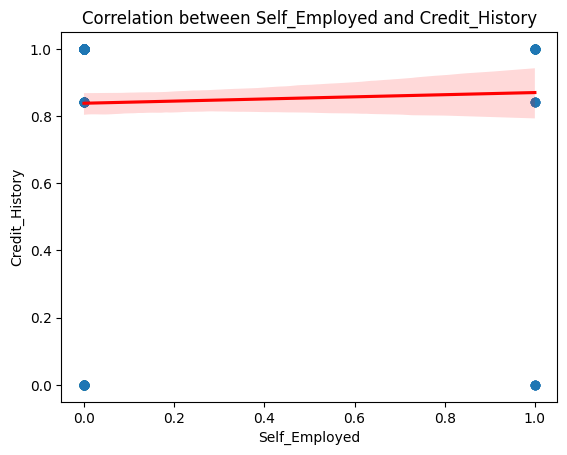

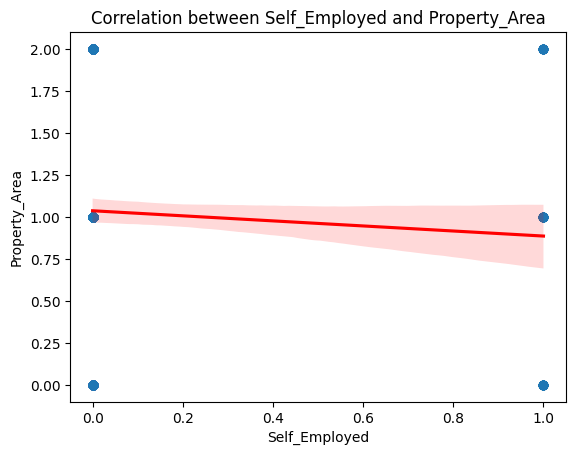

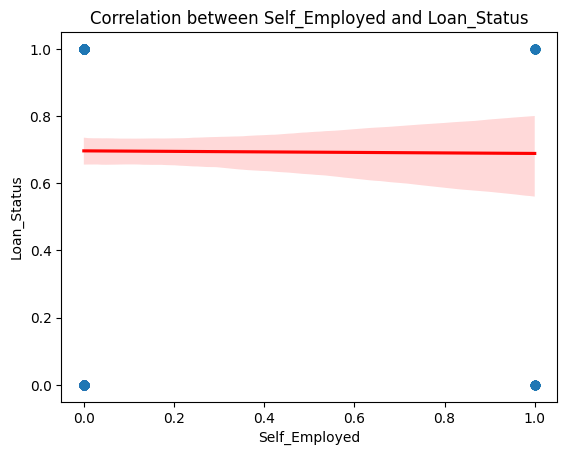

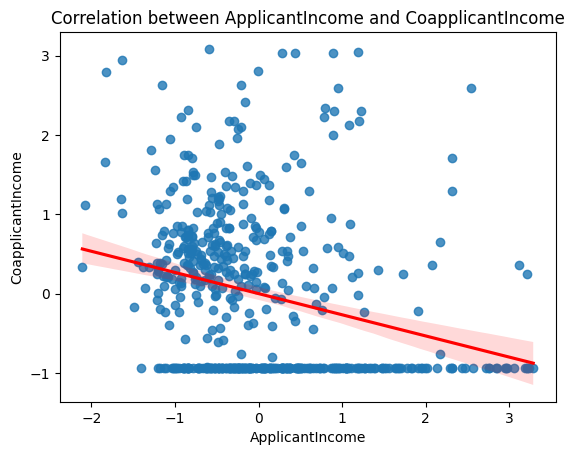

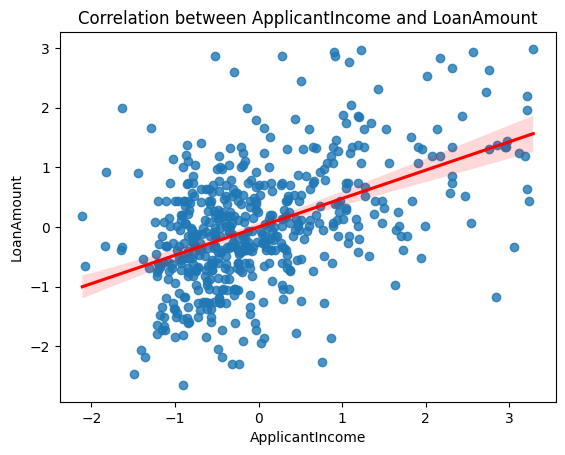

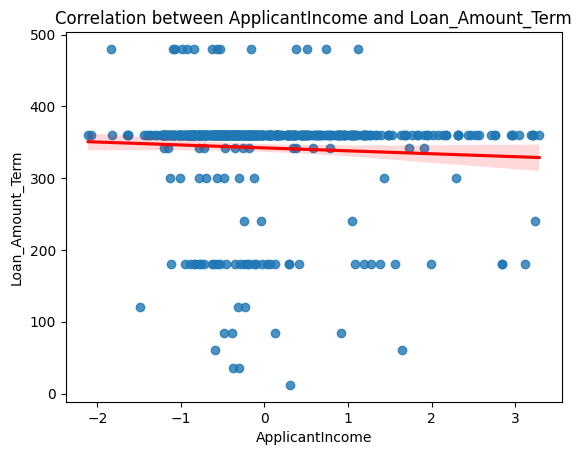

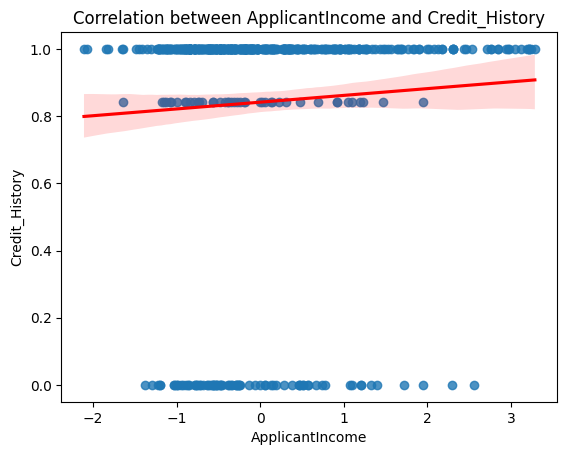

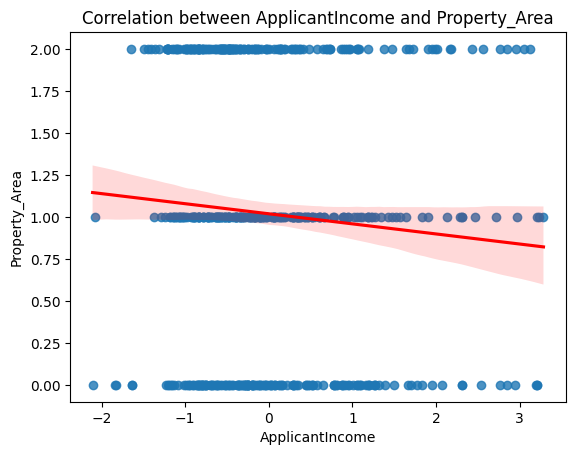

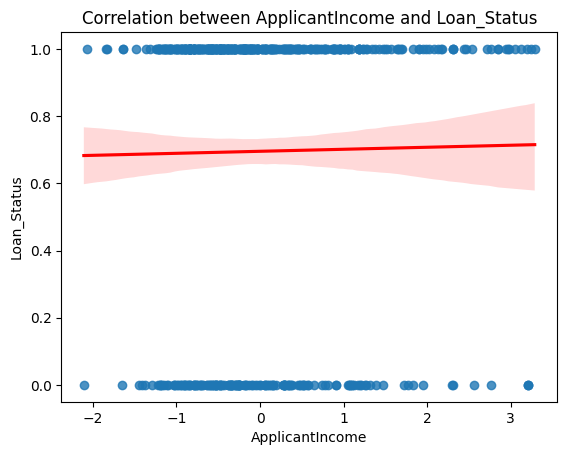

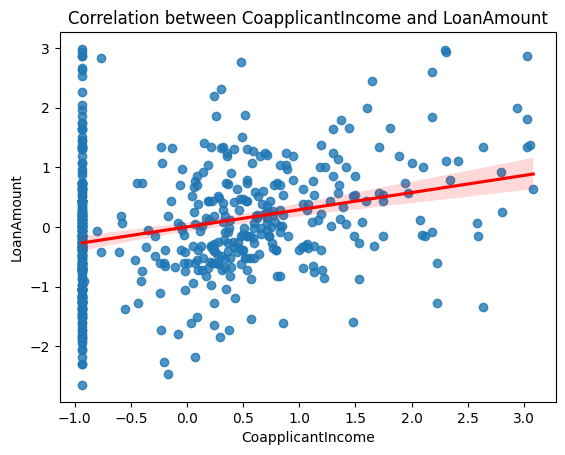

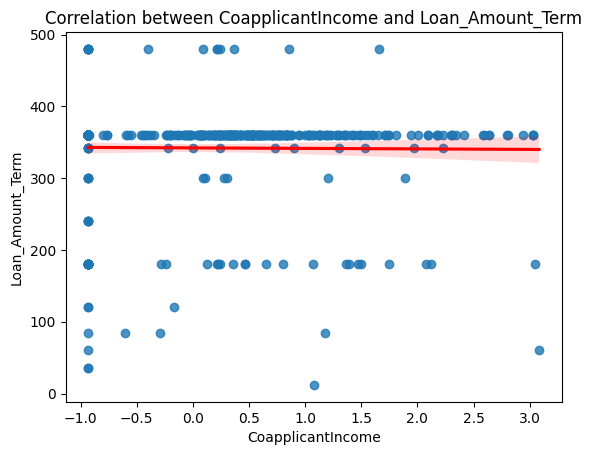

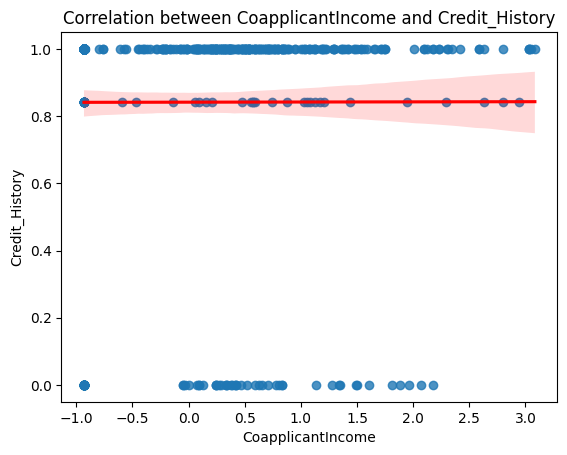

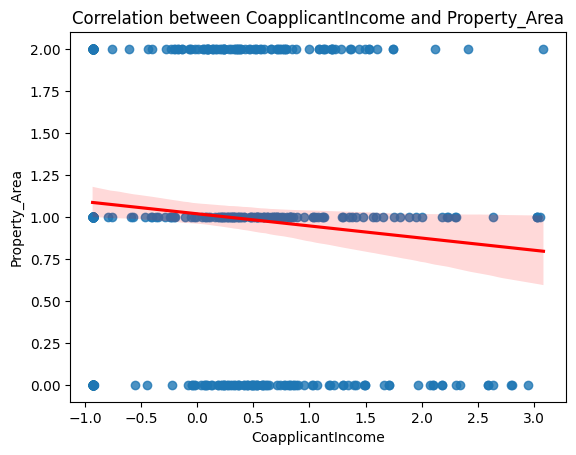

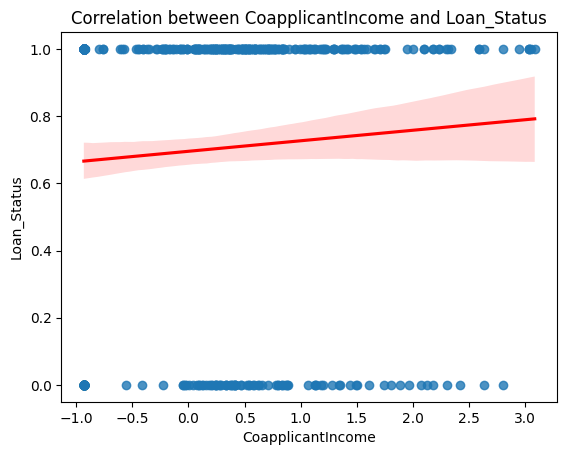

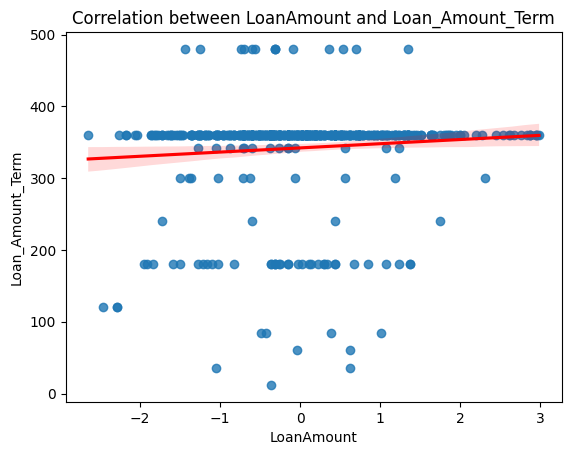

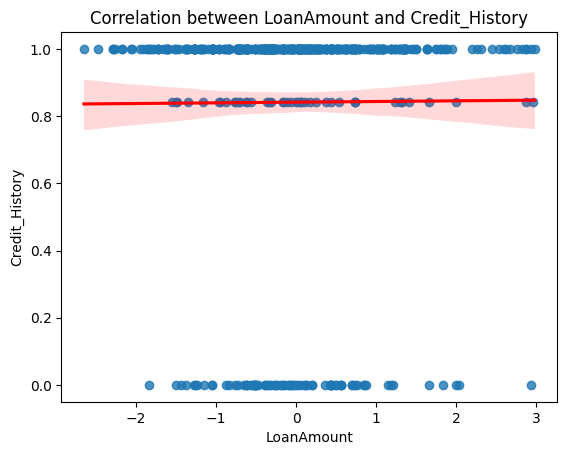

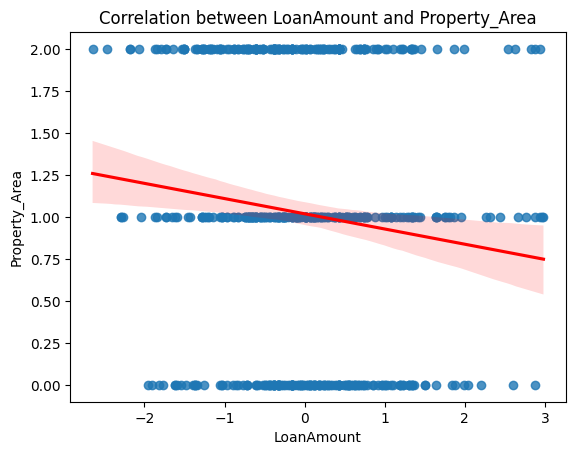

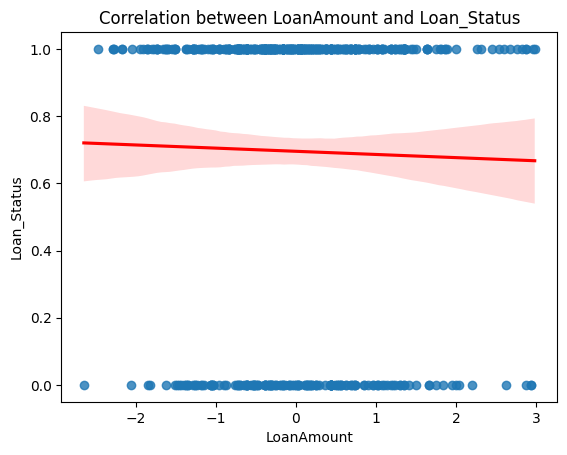

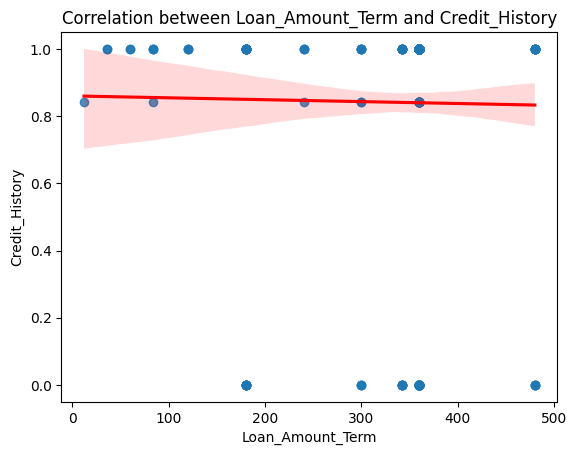

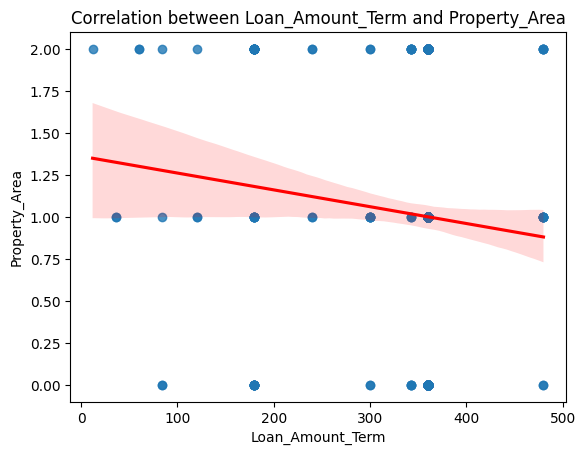

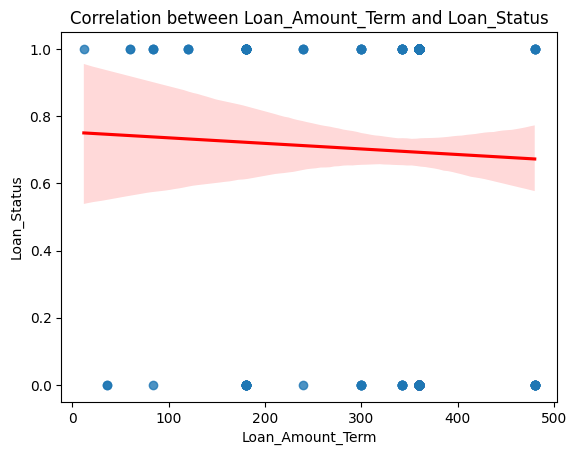

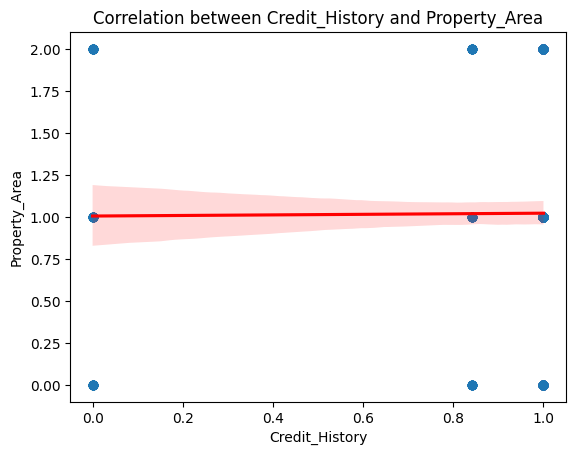

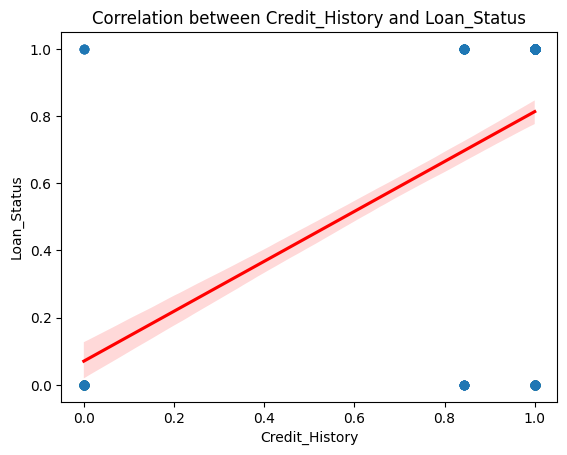

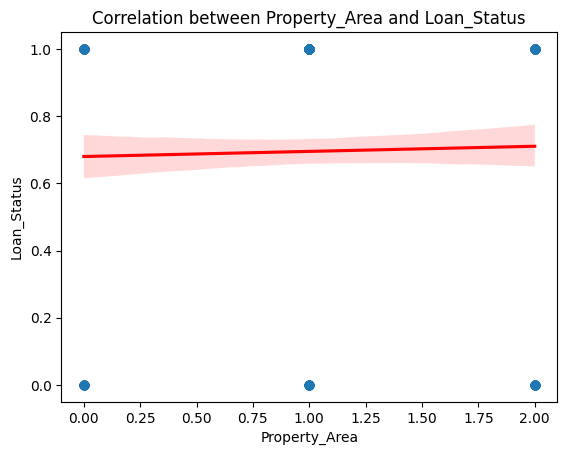

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
cleaned_df=cleaned_df.iloc[:,1:]
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
for i in range(len(cleaned_df.columns)):
    for j in range(i+1, len(cleaned_df.columns)):
      plt.figure() # Create a new figure for each pair of features
      sns.regplot(x=cleaned_df.iloc[:, i], y=cleaned_df.iloc[:, j],line_kws={'color':'red'})
      plt.xlabel(cleaned_df.columns[i])
      plt.ylabel(cleaned_df.columns[j])
      plt.title(f'Correlation between {cleaned_df.columns[i]} and {cleaned_df.columns[j]}')
      plt.show()

***phase 2, testing model, decision tree***

In [209]:
x = cleaned_df.drop("Loan_Status", axis=1)
y = cleaned_df['Loan_Status']


In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Training Decision Tree
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.56      0.63      0.59        30
           1       0.85      0.81      0.83        77

    accuracy                           0.76       107
   macro avg       0.70      0.72      0.71       107
weighted avg       0.77      0.76      0.76       107





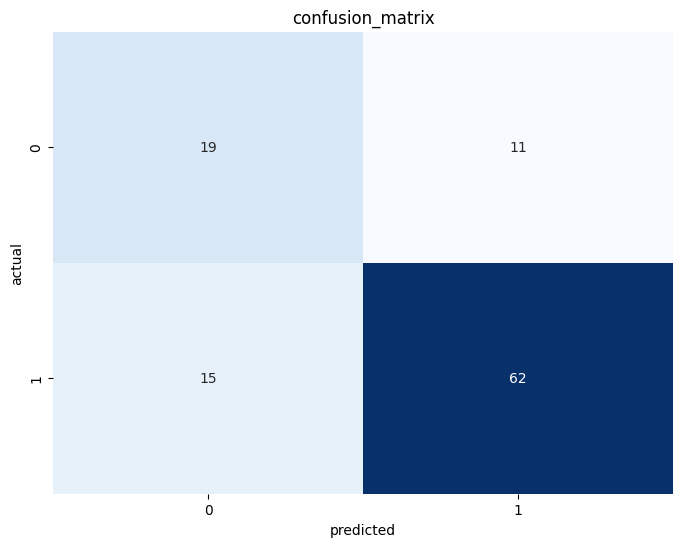

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train )
y_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Training Decision Tree")
print(f"Accuracy: {DT_accuracy:.2f}")
print(classification_report(y_test, y_pred))
print("\n")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot= True, fmt='d', cmap='Blues', cbar= False)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion_matrix')
plt.show()
